## The following is the script and results at the begining, do not use them (except the description of traces), use those at the end

In [1]:
import copy
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')

#### description of RTP traces

In [3]:
import glob
import os

dfs = []

files = glob.glob("Retina/shared/Dataset_jitsi/*/*_500ms_Song_no_log.csv")
for file in files:   
    df = pd.read_csv(file)
    df['name'] = os.path.normpath(file)
    dfs.append(df)

files = glob.glob("Retina/shared/Call_with_log/*/*_500ms_Song_no_log.csv")
for file in files:   
    df = pd.read_csv(file)
    df['name'] = os.path.normpath(file)
    dfs.append(df)

In [120]:
from datetime import datetime

start_time = datetime.strptime(dfs[0].iloc[0]['timestamp'], '%Y-%m-%d %H:%M:%S.%f')
end_time = datetime.strptime(dfs[0].iloc[0]['timestamp'], '%Y-%m-%d %H:%M:%S.%f')

duration_list = [] # seconds

In [121]:
for df in dfs:
    df_temp = copy.deepcopy(df)

    min_time = datetime.strptime(df_temp['timestamp'].min(), '%Y-%m-%d %H:%M:%S.%f')
    max_time = datetime.strptime(df_temp['timestamp'].max(), '%Y-%m-%d %H:%M:%S.%f')

    duration_list.append(max_time.timestamp() - min_time.timestamp())

    if min_time <= start_time:
        start_time = min_time
    if max_time >= end_time:
        end_time = max_time

In [122]:
avg_duration = sum(duration_list) / len(duration_list)
max_duration = max(duration_list)
min_duration = min(duration_list)
print(f'The total duration is {sum(duration_list)} seconds ({sum(duration_list) / 60 / 60} hours)')
print(f'The average duration is {avg_duration} seconds ({avg_duration / 60 / 60} hours) ({avg_duration / 60} mins)')
print(f'The maximum duration is {max_duration} seconds ({max_duration / 60 / 60} hours)')
print(f'The minimum duration is {min_duration} seconds ({min_duration / 60 / 60} hours)')
print(f'The record starts from {start_time} and ends at {end_time}')
print('The maximum number of participants is 6 and the minimum is 2')

The total duration is 239432.0 seconds (66.50888888888889 hours)
The average duration is 3470.0289855072465 seconds (0.9638969404186796 hours) (57.83381642512077 mins)
The maximum duration is 8100.0 seconds (2.25 hours)
The minimum duration is 80.5 seconds (0.02236111111111111 hours)
The record starts from 2020-04-17 07:59:45 and ends at 2021-01-18 15:03:18
The maximum number of participants is 6 and the minimum is 2


In [123]:
# num_packet_loss, num_packets

num_packets_jitsi = 0
num_packets_loss_jitsi = 0
num_packets_webex = 0
num_packets_loss_webex = 0

for df in dfs:
    df_temp = copy.deepcopy(df)
    df_temp = df_temp.loc[~df_temp['ip_src'].str.startswith('192')]
    if not df_temp.empty:
        if 'jitsi' in df_temp.iloc[0]['name']:
            num_packets_jitsi += df_temp['num_packets'].sum()
            num_packets_loss_jitsi += df_temp['num_packet_loss'].sum()
        else:
            num_packets_webex += df_temp['num_packets'].sum()
            num_packets_loss_webex += df_temp['num_packet_loss'].sum()

num_packets_jitsi += num_packets_loss_jitsi
num_packets_webex += num_packets_loss_webex

In [136]:
print(f'For jitsi: there are {num_packets_jitsi} packets sent and {num_packets_loss_jitsi} lost, occupying {num_packets_loss_jitsi/num_packets_jitsi*100}%')
print(f'For webex: there are {num_packets_webex} packets sent and {num_packets_loss_webex} lost, occupying {num_packets_loss_webex/num_packets_webex*100}%')

For jitsi: there are 36309637 packets sent and 135930 lost, occupying 0.3743634231319911%
For webex: there are 23089095 packets sent and 81040 lost, occupying 0.3509882046048145%


#### characterization

In [2]:
# colors for plot
color_for_plot_list = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'b', 'm', 'g']

In [3]:
# read csv file 

# df_input = pd.read_csv('Retina/shared/Dataset_jitsi/Call_08_ml4qoe_2020_12_14_dena/jitsi_6p_avs_ss_outbound_little_ml4qoe_2020_12_14_500ms_Song_no_log.csv')
# df_input = pd.read_csv('Retina/shared/Dataset_jitsi/Call_03_retina_2p_avs_dena/jitsi_retina_2p_avs_2020_12_11_dena_500ms_Song_no_log.csv')
df_input = pd.read_csv('Retina/shared/Dataset_jitsi/Call_17_2p_meo/Jitsi_Meo_2p_av_2020_11_12_500ms_Song_no_log.csv')
df_input.columns

Index(['timestamp', 'interarrival_std', 'interarrival_mean',
       'interarrival_min', 'interarrival_max', 'interarrival_count',
       'interarrival_kurtosis', 'interarrival_skew', 'interarrival_moment3',
       'interarrival_moment4', 'interarrival_max_min_diff',
       'interarrival_max_min_R', 'interarrival_min_max_R',
       'interarrival_len_unique_percent',
       'interarrival_max_value_count_percent', 'kbps', 'len_udp_std',
       'len_udp_mean', 'len_udp_min', 'len_udp_max', 'num_packets',
       'len_udp_kurtosis', 'len_udp_skew', 'len_udp_moment3',
       'len_udp_moment4', 'len_udp_max_min_diff', 'len_udp_max_min_R',
       'len_udp_min_max_R', 'len_udp_len_unique_percent',
       'len_udp_max_value_count_percent', 'interlength_udp_std',
       'interlength_udp_mean', 'interlength_udp_min', 'interlength_udp_max',
       'interlength_udp_count', 'interlength_udp_kurtosis',
       'interlength_udp_skew', 'interlength_udp_moment3',
       'interlength_udp_moment4', 'interlen

In [4]:
# drop data with source being my end and drop useless columns

df_inter = copy.deepcopy(df_input)
df_inter = df_inter.loc[~df_inter['ip_src'].str.startswith('192')]
drop_col = ['software', 'label', 'pcap', 'ssrc', 'rtp_seq_num_packet_loss', 'ip_src', 'ip_dst', 'prt_src', 'prt_dst', 'rtp_csrc_csrc_agg']
for col in df_inter.columns:
    if col in drop_col or col.startswith('rtp_interarrival'): # maybe also for 'rtp_inter'
        df_inter.drop(col, axis=1, inplace=True)

In [10]:
# split data into flows and ignore flow with less than 100 samples

df_flow = df_inter[['flow']].drop_duplicates()
df_total = []
for i in range(0, df_flow.shape[0]):
    flow_id = df_flow.iloc[i,0]
    df_check = df_inter[df_inter['flow'] == flow_id].copy()
    if df_check.shape[0] > 1000:
        df_total.append(df_check)

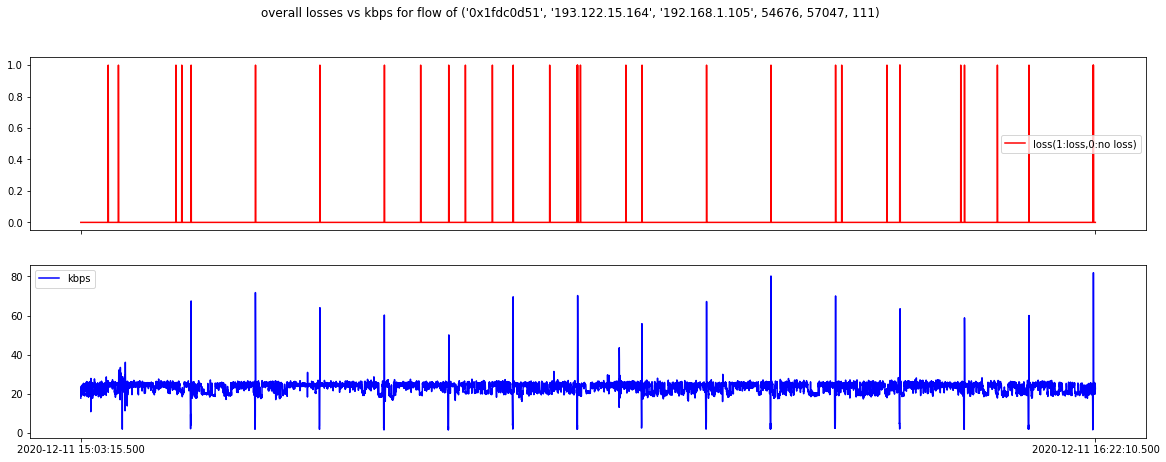

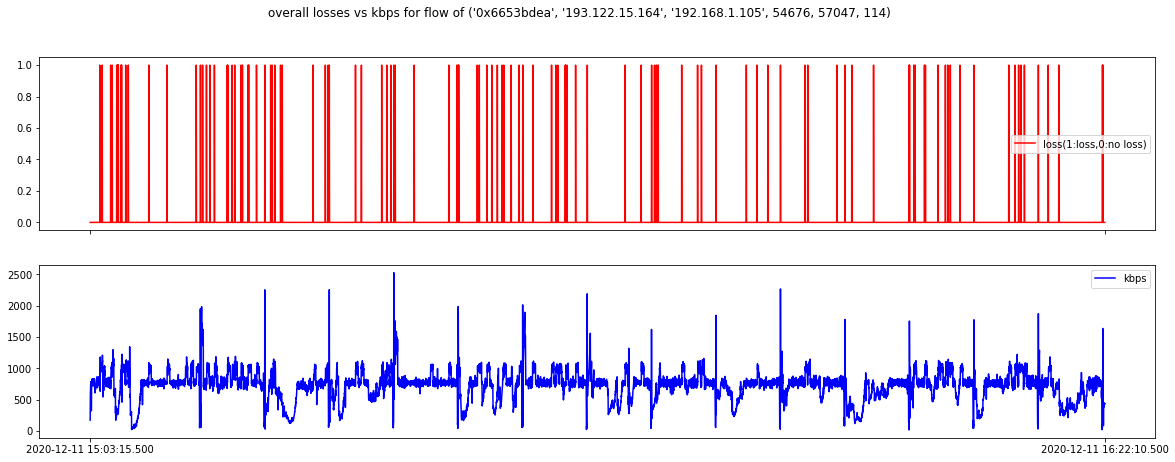

In [11]:
# check the overall behaviour for certain feature w.r.t. losses
# example kbps

for df_per_flow in df_total:
    df_temp = copy.deepcopy(df_per_flow)
    df_temp['lossOrNot'] = [1 if x>0 else 0 for x in df_temp['num_packet_loss']]
    df_temp.reset_index(inplace=True)
    flow_id = str(df_temp['flow'].drop_duplicates().tolist())[2:-2]
    fig, axs = plt.subplots(2, figsize=(20, 7), sharex=True)
    fig.suptitle(f'overall losses vs kbps for flow of {flow_id}')
    axs[0].plot(df_temp['lossOrNot'], color='r', label='loss(1:loss,0:no loss)')
    axs[0].legend()
    axs[1].plot(df_temp['kbps'], color='b', label='kbps')
    axs[1].set_xticks([0, len(df_temp['lossOrNot'])])
    axs[1].set_xticklabels([df_temp.iloc[0]['timestamp'],df_temp.iloc[-1]['timestamp']])
    axs[1].legend()

In [12]:
df_per_flow.columns

Index(['timestamp', 'interarrival_std', 'interarrival_mean',
       'interarrival_min', 'interarrival_max', 'interarrival_count',
       'interarrival_kurtosis', 'interarrival_skew', 'interarrival_moment3',
       'interarrival_moment4', 'interarrival_max_min_diff',
       'interarrival_max_min_R', 'interarrival_min_max_R',
       'interarrival_len_unique_percent',
       'interarrival_max_value_count_percent', 'kbps', 'len_udp_std',
       'len_udp_mean', 'len_udp_min', 'len_udp_max', 'num_packets',
       'len_udp_kurtosis', 'len_udp_skew', 'len_udp_moment3',
       'len_udp_moment4', 'len_udp_max_min_diff', 'len_udp_max_min_R',
       'len_udp_min_max_R', 'len_udp_len_unique_percent',
       'len_udp_max_value_count_percent', 'interlength_udp_std',
       'interlength_udp_mean', 'interlength_udp_min', 'interlength_udp_max',
       'interlength_udp_count', 'interlength_udp_kurtosis',
       'interlength_udp_skew', 'interlength_udp_moment3',
       'interlength_udp_moment4', 'interlen

In [13]:
# check the linear correlation to give a intuition for selection of features

from scipy.stats.stats import pearsonr   

non_feature_col = ['timestamp', 'p_type', 'num_packet_loss', 'lossOrNot', 'index']
for df_per_flow in df_total:
    df_temp = copy.deepcopy(df_per_flow)
    df_temp['lossOrNot'] = [1 if x>0 else 0 for x in df_temp['num_packet_loss']]
    for col in df_temp.columns:
        if col not in non_feature_col:
            try:
                print(col + ' ' + str(pearsonr(df_temp['lossOrNot'], df_temp[col])[0]))
            except:
                pass
    break

interarrival_std 0.042334372417441125
interarrival_mean 0.032993399640958675
interarrival_min 0.01681646443732844
interarrival_max 0.04251261963802069
interarrival_count 0.39636799677995954
interarrival_kurtosis 0.057718450565389615
interarrival_skew 0.08148249267204587
interarrival_moment3 -0.019783397601405597
interarrival_moment4 0.0063610448028566515
interarrival_max_min_diff 0.03968712484252523
interarrival_max_min_R 0.0434302502022983
interarrival_min_max_R -0.04343025020229829
interarrival_len_unique_percent -0.07915441377528148
interarrival_max_value_count_percent 0.04175069800342255
kbps 0.313350021622526
len_udp_std -0.004141043183495734
len_udp_mean -0.015342400419919144
len_udp_min -0.022365029154874032
len_udp_max -0.007355089674588386
num_packets 0.39636799677995954
len_udp_kurtosis -0.003198110134637012
len_udp_skew -0.00030137028924082354
len_udp_moment3 0.0005081401351034118
len_udp_moment4 -0.0030925320834290005
len_udp_max_min_diff 0.0077319525680926105
len_udp_max_m

In [14]:
# selected features for now

feature_list = [
    'interarrival_mean', 
    'interarrival_count', 
    'interarrival_kurtosis', 
    'kbps',
    'len_udp_len_unique_percent', 
    'num_packets',
    'interlength_udp_count', 
    'interlength_udp_moment4',
    'interlength_udp_len_unique_percent',
    'rtp_inter_timestamp_std',
    'rtp_marker_sum_check',
    'inter_time_sequence_count',
    'inter_time_sequence_len_unique_percent'
]

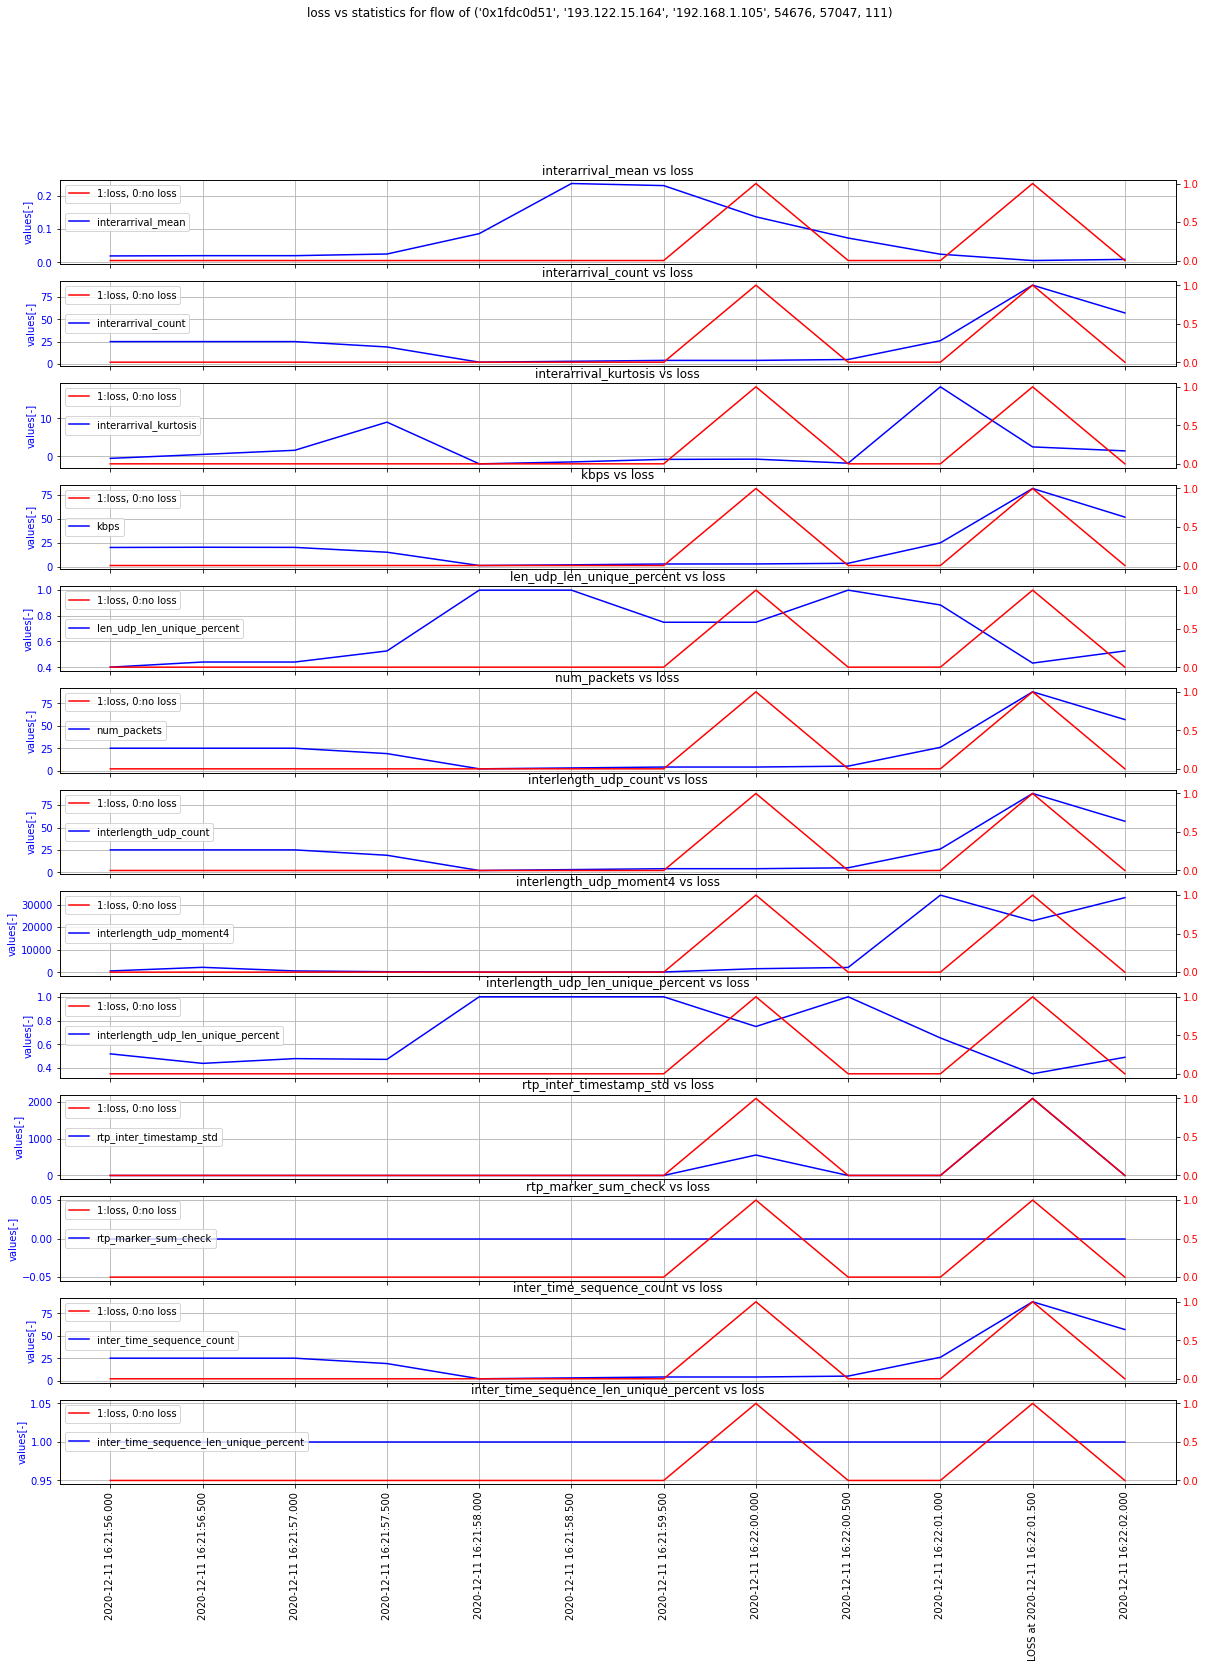

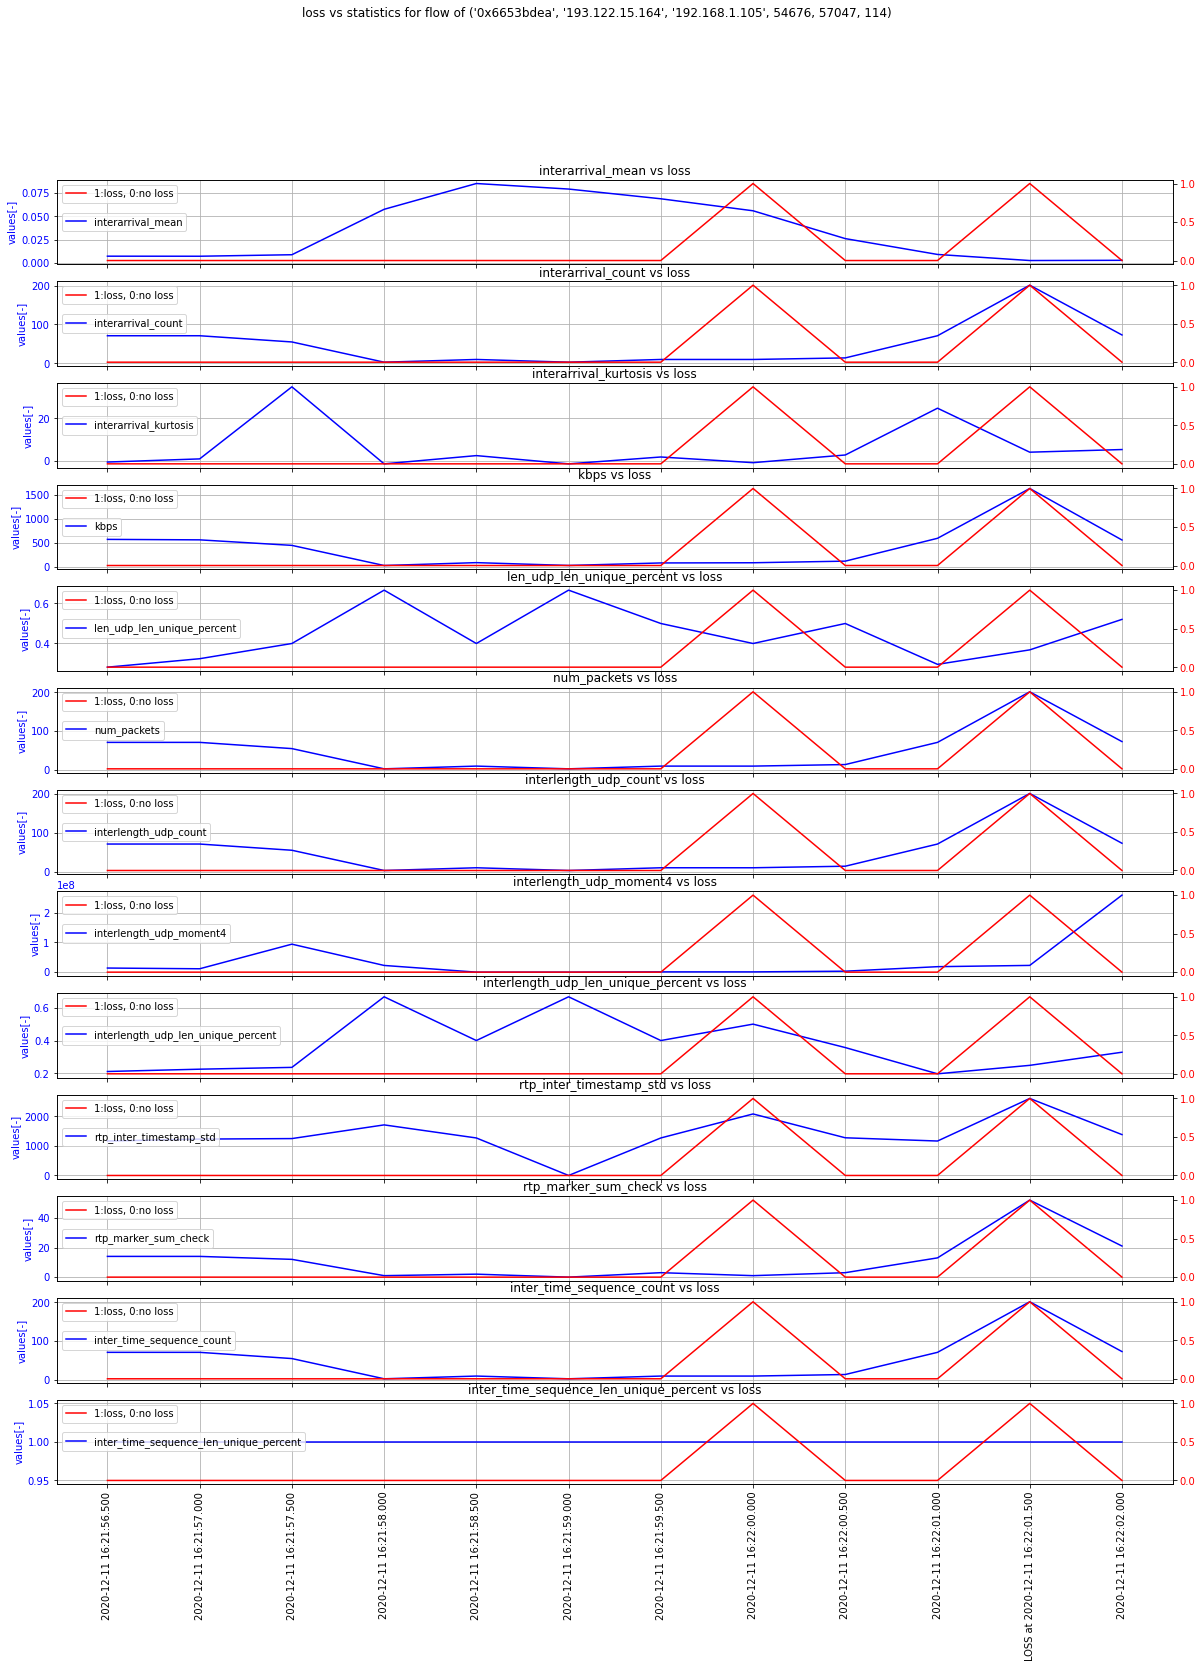

In [15]:
# example, certain loss with statistics in past 5 sec

for df_per_flow in df_total:
    df_temp = copy.deepcopy(df_per_flow)
    df_temp['lossOrNot'] = [1 if x>0 else 0 for x in df_temp['num_packet_loss']]
    df_temp.reset_index(inplace=True)
    idx_list = df_temp.index[df_temp['num_packet_loss'] > 1].tolist()
    if len(idx_list) != 0:
        num_backward = 10
        loss_idx = idx_list[-1] 
        lossOrNot = df_temp.iloc[loss_idx-num_backward : loss_idx+2]['lossOrNot'].tolist()
    #     x_timeStamp_label = [df_temp.iloc[loss_idx-num_backward]['timestamp'], ' ', ' ', ' ', ' ', ' ', f'loss at {df_temp.iloc[loss_idx+2]["timestamp"]}']
        x_timestamp_label = df_temp.iloc[loss_idx-num_backward : loss_idx+2]['timestamp'].tolist()
        x_timestamp_label[-2] = f'LOSS at {x_timestamp_label[-2]}'
        fig, axs = plt.subplots(len(feature_list), figsize=(20, 24), sharex=True)
        fig.suptitle(f'loss vs statistics for flow of {str(df_temp["flow"].drop_duplicates().tolist())[2:-2]}')
        for i in range(0, len(feature_list)):
            feature_values = df_temp.iloc[loss_idx-num_backward: loss_idx+2][feature_list[i]].tolist()
            axs[i].plot(x_timestamp_label, feature_values, color='blue', label=feature_list[i])
            axs[i].set_title(feature_list[i] + ' vs loss')
            axs[i].tick_params(axis='y', labelcolor='blue')
    #         axs[i].set_xticks([0, len(lossOrNot)-7, len(lossOrNot)-6, len(lossOrNot)-5, len(lossOrNot)-4, len(lossOrNot)-3, len(lossOrNot)-2])
            axs[i].set_xticklabels(x_timestamp_label, rotation=90)
    #         if feature_list[i] == 'kbps':
    #             axs[i].set_ylim([0, 100])
            axs[i].grid(True)
            axs[i].legend(loc=6)
            axs[i].set_ylabel('values[-]', color='blue')
            ax_loss = axs[i].twinx()
            ax_loss.plot(lossOrNot, color='r', label='1:loss, 0:no loss')
            ax_loss.tick_params(axis='y', labelcolor='r')
            ax_loss.legend(loc=2)
#     break

In [9]:
# fill the missed data and build features for past 5 sec

df_total_final = []
flow_name_list = []
for df_per_flow in df_total:
    df_temp = copy.deepcopy(df_per_flow)
    df_temp.reset_index(inplace=True)
    df_temp['lossOrNot'] = [1 if x>0 else 0 for x in df_temp['num_packet_loss']]
    flow_name = str(df_temp["flow"].drop_duplicates().tolist())[2:-2]
    flow_name_list.append(flow_name)
    df_temp.drop(['p_type', 'index', 'flow', 'num_packet_loss'], axis=1, inplace=True)
    start_time = pd.to_datetime(df_temp['timestamp'].min())
    stop_time = pd.to_datetime(df_temp['timestamp'].max())
    timestamp_ser = pd.date_range(start_time, stop_time, freq="500L")
    correct_len = len(timestamp_ser)
    if df_temp.shape[0] == correct_len:
        df_full = df_temp.copy()
    else:
        print(f'it should be {correct_len}, but it is {df_temp.shape[0]}')
        df_temp['timestamp'] = pd.to_datetime(df_temp['timestamp'])
        df_full = pd.DataFrame({'timestamp': timestamp_ser})
        df_full['timestamp'] = df_full['timestamp']
        df_full = df_full.merge(df_temp, on='timestamp', how='left')
        df_full['lossOrNot'] = df_full['lossOrNot'].fillna(0)
        
        nan_index_list = df_full[np.isnan(df_full['interarrival_std'])].index
        for idx in reversed(range(len(nan_index_list))):
            if df_full.iloc[nan_index_list[idx]+1]['lossOrNot'] > 0:
                one_position_before_loss_list = [x-1 for x in df_full[df_full['lossOrNot'] > 0].index]
                mean_val_each_col = df_full.iloc[one_position_before_loss_list, :].mean()
                timestamp_temp = df_full.iloc[nan_index_list[idx]]['timestamp']
                df_full.iloc[nan_index_list[idx]] = mean_val_each_col
                df_full.at[nan_index_list[idx], 'lossOrNot'] = 0
                df_full.at[nan_index_list[idx], 'timestamp'] = timestamp_temp
                
            elif df_full.iloc[nan_index_list[idx]+2]['lossOrNot'] > 0:
                two_position_before_loss_list = [x-2 for x in df_full[df_full['lossOrNot'] > 0].index]
                mean_val_each_col = df_full.iloc[two_position_before_loss_list, :].mean()
                timestamp_temp = df_full.iloc[nan_index_list[idx]]['timestamp']
                df_full.iloc[nan_index_list[idx]] = mean_val_each_col
                df_full.at[nan_index_list[idx], 'lossOrNot'] = 0
                df_full.at[nan_index_list[idx], 'timestamp'] = timestamp_temp
                
            elif df_full.iloc[nan_index_list[idx]+3]['lossOrNot'] > 0:
                three_position_before_loss_list = [x-3 for x in df_full[df_full['lossOrNot'] > 0].index]
                mean_val_each_col = df_full.iloc[three_position_before_loss_list, :].mean()
                timestamp_temp = df_full.iloc[nan_index_list[idx]]['timestamp']
                df_full.iloc[nan_index_list[idx]] = mean_val_each_col
                df_full.at[nan_index_list[idx], 'lossOrNot'] = 0
                df_full.at[nan_index_list[idx], 'timestamp'] = timestamp_temp
                
            elif df_full.iloc[nan_index_list[idx]+4]['lossOrNot'] > 0:
                four_position_before_loss_list = [x-4 for x in df_full[df_full['lossOrNot'] > 0].index]
                mean_val_each_col = df_full.iloc[four_position_before_loss_list, :].mean()
                timestamp_temp = df_full.iloc[nan_index_list[idx]]['timestamp']
                df_full.iloc[nan_index_list[idx]] = mean_val_each_col
                df_full.at[nan_index_list[idx], 'lossOrNot'] = 0
                df_full.at[nan_index_list[idx], 'timestamp'] = timestamp_temp
                
            elif df_full.iloc[nan_index_list[idx]+1]['lossOrNot'] < 1:
                for col in df_full.columns:
                    if col not in ['timestamp', 'lossOrNot']:
                        df_full.at[nan_index_list[idx], col] = df_full.iloc[nan_index_list[idx]+1][col]
    
#     # start building features
#     past_sec = 5
#     window_size = 2 * past_sec
#     for col in df_full.columns:
#         if col not in ['timestamp', 'lossOrNot']:
#             df_full[f'{col}_list'] = pd.Series([[-1] for i in range(0, df_full.shape[0])])
#             for idx in range(window_size, df_full.shape[0]):
#                 df_full.at[idx, f'{col}_list'] = df_full.iloc[idx-window_size : idx][col].tolist()
    
    df_total_final.append(df_full)
            
#     break

it should be 9471, but it is 9437
it should be 9471, but it is 9450


In [313]:
# df_full[np.isnan(df_full['interarrival_std'])]
# df_full[df_full['lossOrNot'] > 0]
df_full

timestamp  interarrival_std  interarrival_mean  \
0            2020-12-14 14:40:01          0.013425           0.021248   
1     2020-12-14 14:40:01.500000          0.009302           0.033978   
2            2020-12-14 14:40:02          0.006252           0.032693   
3     2020-12-14 14:40:02.500000          0.007178           0.033345   
4            2020-12-14 14:40:03          0.016779           0.033702   
...                          ...               ...                ...   
5416         2020-12-14 15:25:09          0.005471           0.032937   
5417  2020-12-14 15:25:09.500000          0.008110           0.033856   
5418         2020-12-14 15:25:10          0.014180           0.033212   
5419  2020-12-14 15:25:10.500000          0.006381           0.032876   
5420         2020-12-14 15:25:11          0.016144           0.033200   

      interarrival_min  interarrival_max  interarrival_count  \
0             0.000776          0.037455                 8.0   
1             0.014434          0.050271                15.0   
2             0.025163          0.046319                15.0   
3             0.024897          0.049866                15.0   
4             0.001575          0.065650                14.0   
...                ...               ...                 ...   
5416          0.026986          0.044899                15.0   
5417          0.024608          0.050635                15.0   
5418          0.000000          0.065048                15.0   
5419          0.026225          0.048618                14.0   
5420          0.001254          0.074408                14.0   

      interarrival_kurtosis  interarrival_skew  interarrival_moment3  \
0                 -1.348637          -0.296383         -5.868983e-07   
1                  0.033205           0.112232          8.144706e-08   
2                  0.256901           1.179941          2.599584e-07   
3                  0.088915           1.070747          3.571281e-07   
4                  0.052937          -0.113531         -4.798677e-07   
...                     ...                ...                   ...   
5416               0.647127           1.318863          1.947503e-07   
5417               0.202646           1.327155          6.384276e-07   
5418               1.486493           0.049237          1.265941e-07   
5419               1.143692           1.411004          3.281066e-07   
5420               1.925840           0.750723          2.826471e-06   

      interarrival_moment4  ...  \
0             4.106352e-08  ...   
1             1.978098e-08  ...   
2             4.333738e-09  ...   
3             7.144785e-09  ...   
4             2.086386e-07  ...   
...                    ...  ...   
5416          2.846572e-09  ...   
5417          1.207153e-08  ...   
5418          1.580280e-07  ...   
5419          5.925201e-09  ...   
5420          2.885140e-07  ...   

                         inter_time_sequence_count_list  \
0                                                  [-1]   
1                                                  [-1]   
2                                                  [-1]   
3                                                  [-1]   
4                                                  [-1]   
...                                                 ...   
5416  [14.0, 15.0, 16.0, 15.0, 15.0, 15.0, 14.0, 16....   
5417  [15.0, 16.0, 15.0, 15.0, 15.0, 14.0, 16.0, 15....   
5418  [16.0, 15.0, 15.0, 15.0, 14.0, 16.0, 15.0, 15....   
5419  [15.0, 15.0, 15.0, 14.0, 16.0, 15.0, 15.0, 15....   
5420  [15.0, 15.0, 14.0, 16.0, 15.0, 15.0, 15.0, 15....   

                      inter_time_sequence_kurtosis_list  \
0                                                  [-1]   
1                                                  [-1]   
2                                                  [-1]   
3                                                  [-1]   
4                                                  [-1]   
...                         

In [267]:
df_total_final[0].columns

Index(['timestamp', 'interarrival_std', 'interarrival_mean',
       'interarrival_min', 'interarrival_max', 'interarrival_count',
       'interarrival_kurtosis', 'interarrival_skew', 'interarrival_moment3',
       'interarrival_moment4', 'interarrival_max_min_diff',
       'interarrival_max_min_R', 'interarrival_min_max_R',
       'interarrival_len_unique_percent',
       'interarrival_max_value_count_percent', 'kbps', 'len_udp_std',
       'len_udp_mean', 'len_udp_min', 'len_udp_max', 'num_packets',
       'len_udp_kurtosis', 'len_udp_skew', 'len_udp_moment3',
       'len_udp_moment4', 'len_udp_max_min_diff', 'len_udp_max_min_R',
       'len_udp_min_max_R', 'len_udp_len_unique_percent',
       'len_udp_max_value_count_percent', 'interlength_udp_std',
       'interlength_udp_mean', 'interlength_udp_min', 'interlength_udp_max',
       'interlength_udp_count', 'interlength_udp_kurtosis',
       'interlength_udp_skew', 'interlength_udp_moment3',
       'interlength_udp_moment4', 'interlen

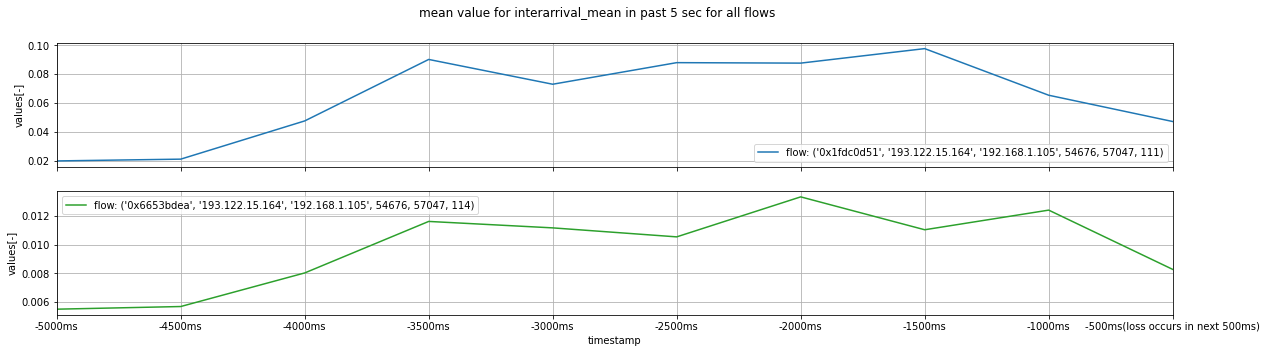

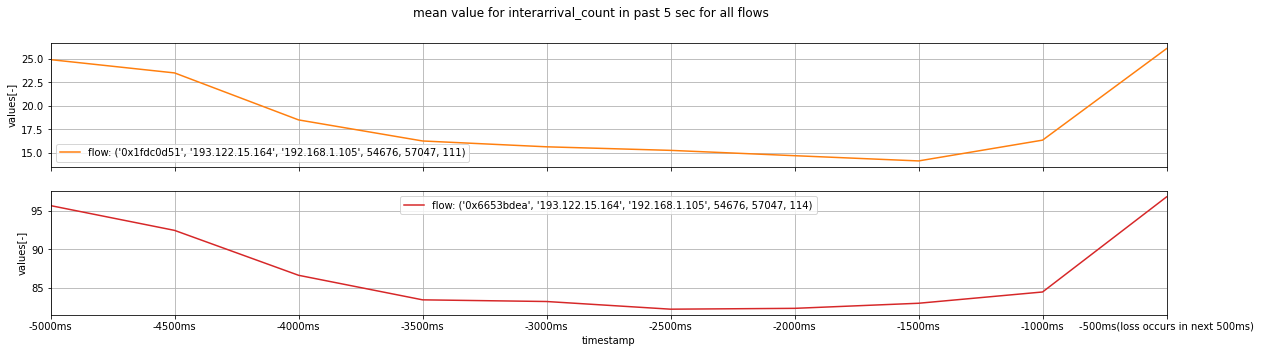

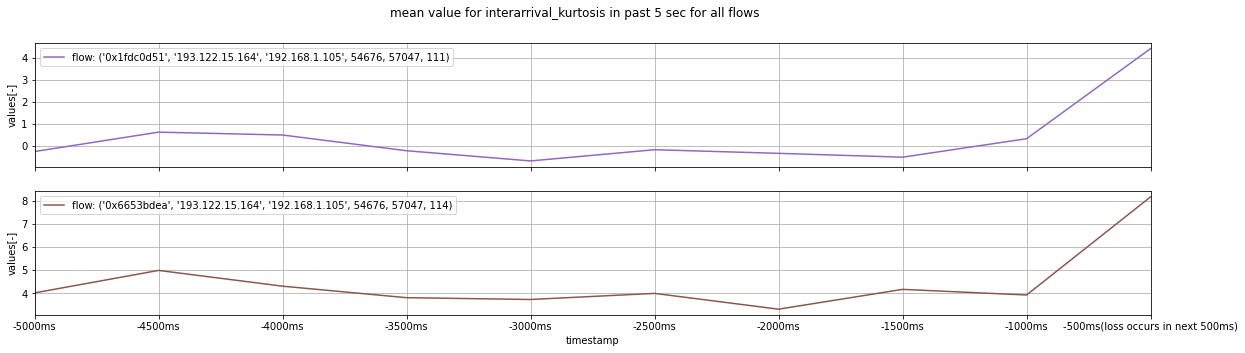

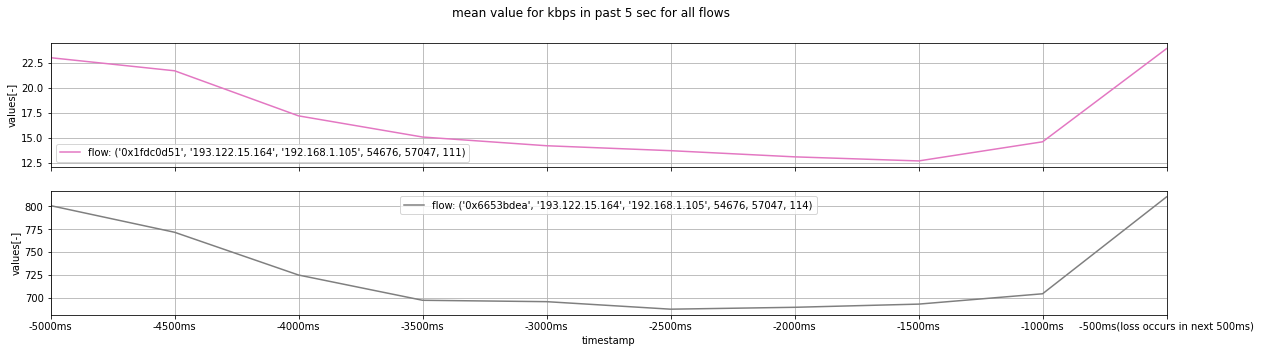

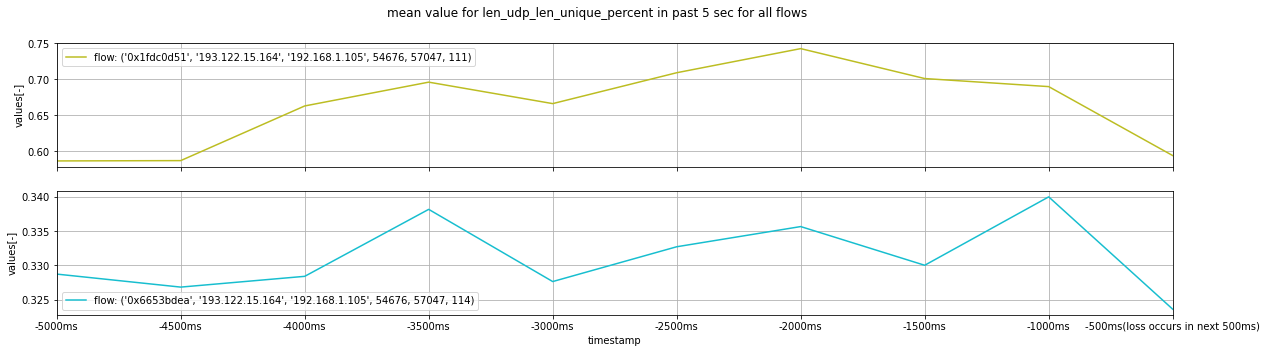

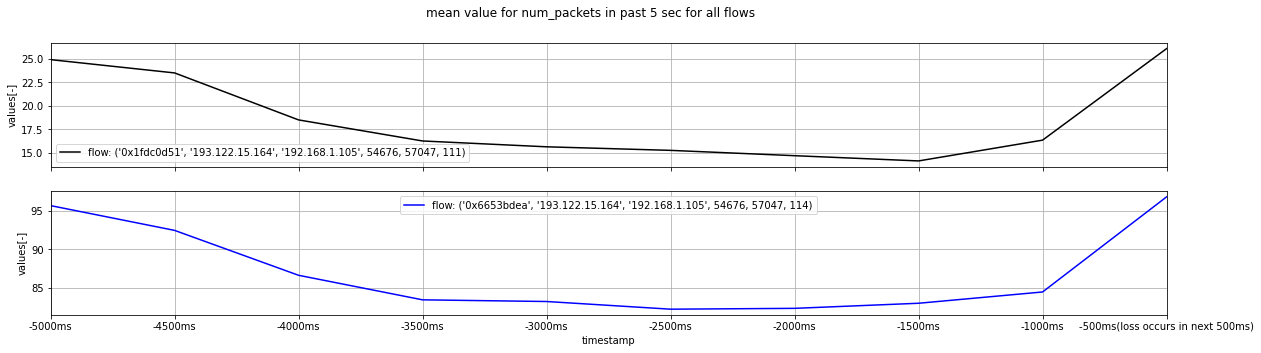

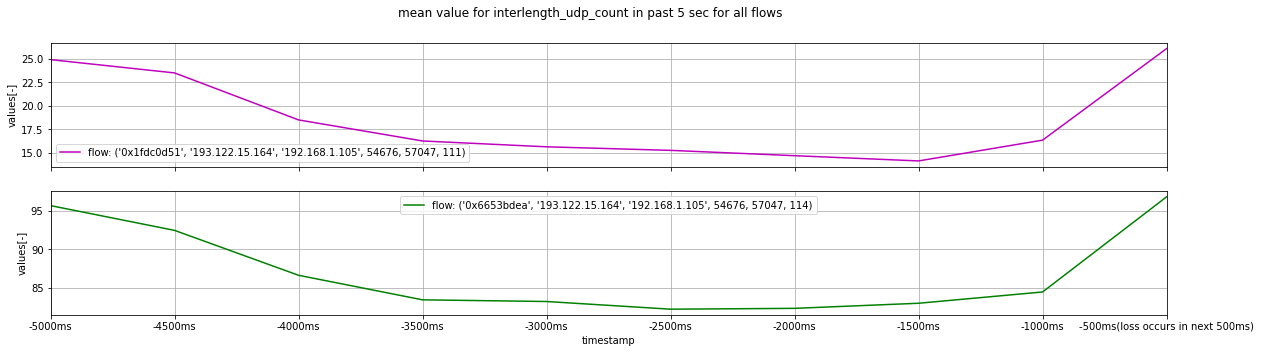

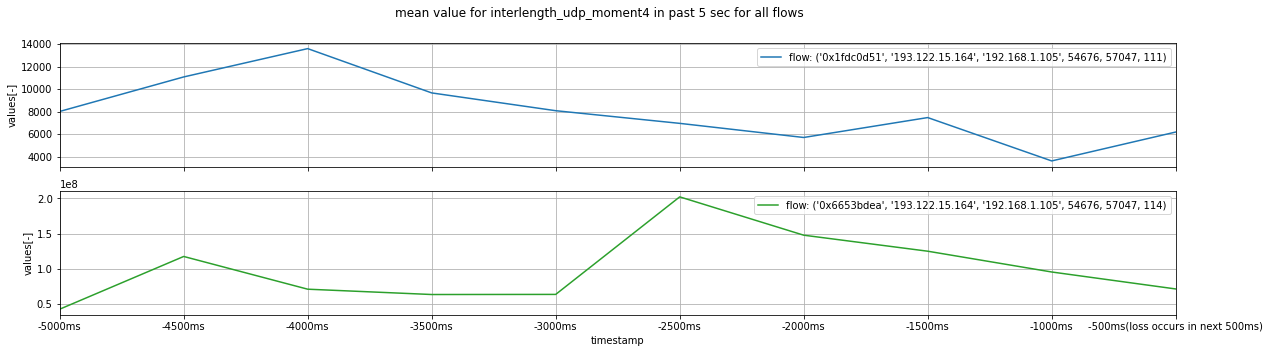

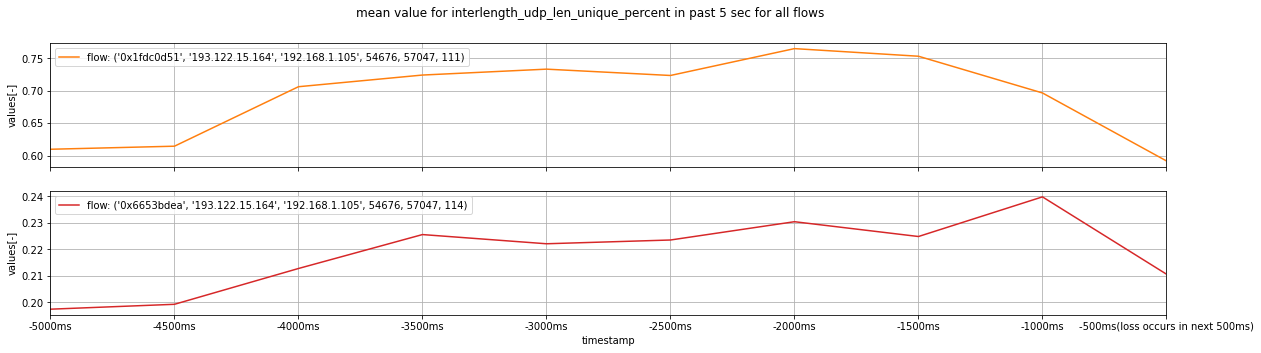

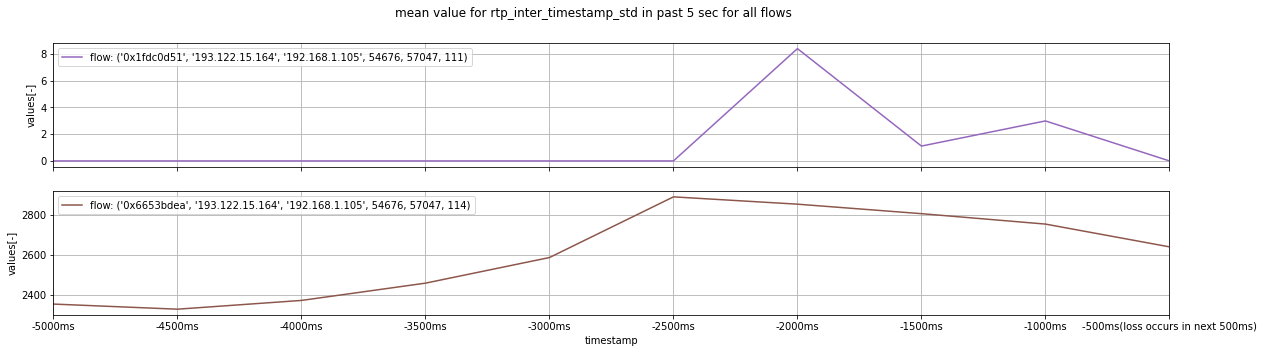

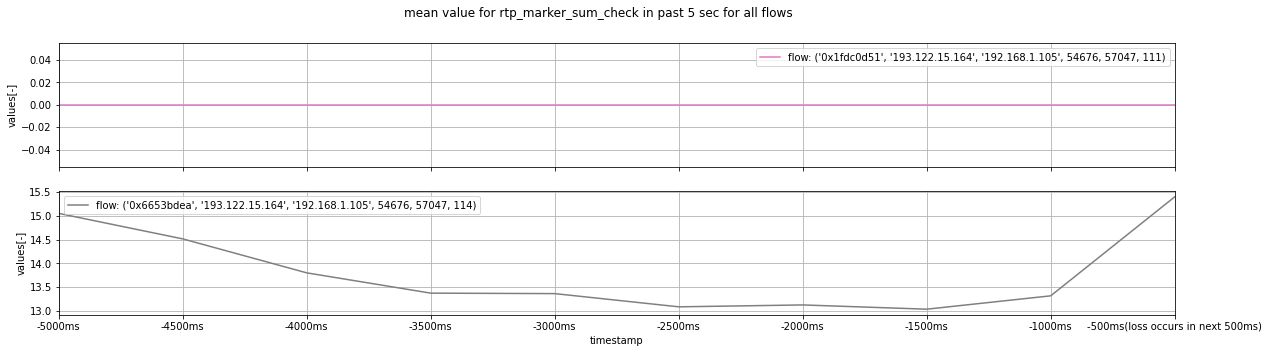

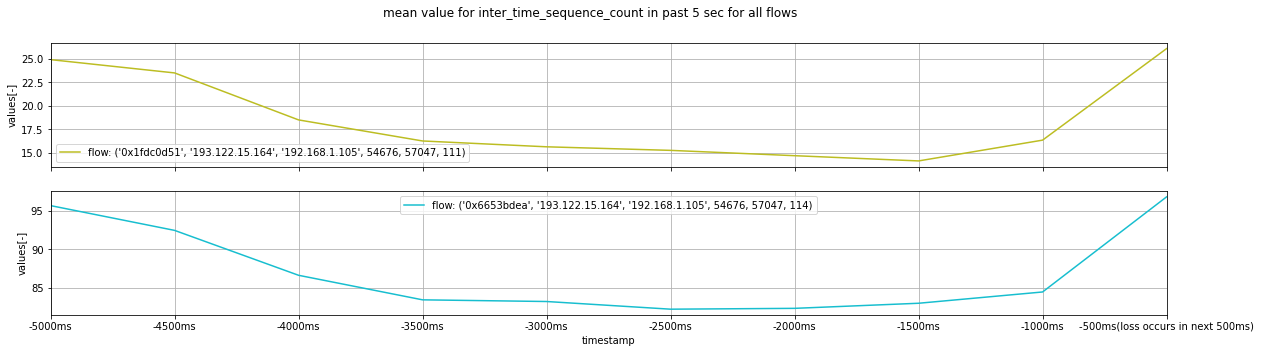

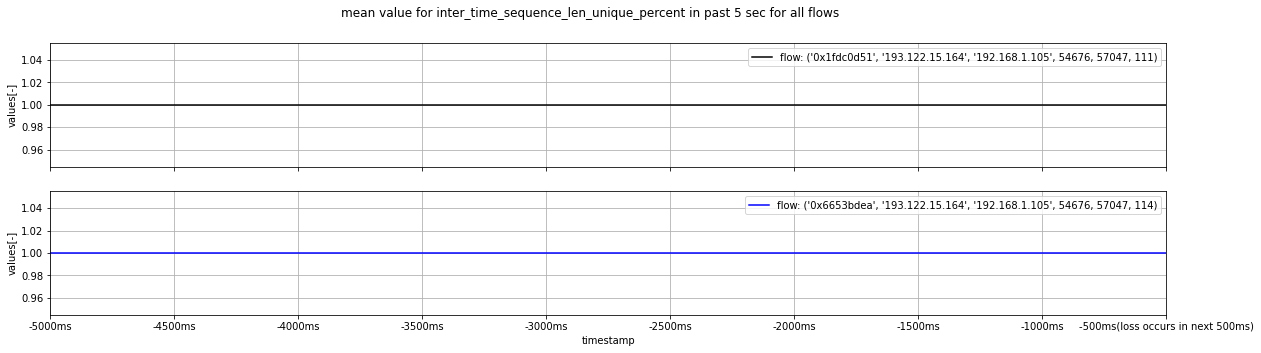

In [20]:
# no loss in the past 5s for a loss

dist_list = [i for i in range(1, 11)]
x_label_list = [f'-{500*i}ms' for i in range(1, 11)]
x_label_list[0] = f'{x_label_list[0]}(loss occurs in next 500ms)'
x_label_list.reverse()

color_idx = 0
for feature in feature_list:
    idx = 0
    fig, axs = plt.subplots(len(df_total_final), figsize=(20,5), sharex=True)
    fig.suptitle(f'mean value for {feature} in past 5 sec for all flows')
    
    for df_per_flow in df_total_final:
        df_temp = copy.deepcopy(df_per_flow)
        loss_index_list = df_temp[df_temp['lossOrNot'] > 0].index
        if len(loss_index_list) != 0:
            loss_index_list_no_consecutive = []
            for i in range(len(loss_index_list)-1, 0, -1):
                if (loss_index_list[i] - loss_index_list[i-1]) not in dist_list:
                    loss_index_list_no_consecutive.append(loss_index_list[i])
            loss_index_list_no_consecutive.append(loss_index_list[0])

            mean_stat_list = []
            std_stat_list = []
            window_size = 2 * 5 # 5sec
            for i in range(window_size, 0, -1):
                values = df_temp.iloc[[x - i for x in loss_index_list_no_consecutive]][feature]
                mean_stat_list.append(values.mean())
                std_stat_list.append(np.std(values))
            
            axs[idx].plot(x_label_list, mean_stat_list, color=color_for_plot_list[color_idx], label=f'flow: {flow_name_list[idx]}')
            axs[idx].grid()
            axs[idx].set_xlim(0, 9)
#             axs[idx].fill_between(x_label_list, np.array(mean_stat_list)-np.array(std_stat_list), np.array(mean_stat_list)+np.array(std_stat_list), color='lightsteelblue')
            axs[idx].legend()
            axs[idx].set_xlabel('timestamp')
            axs[idx].set_ylabel('values[-]')
            axs[idx].label_outer()
            if color_idx == len(color_for_plot_list)-1:
                color_idx = 0
            else:
                color_idx += 1
            
        idx += 1
         
    plt.show()

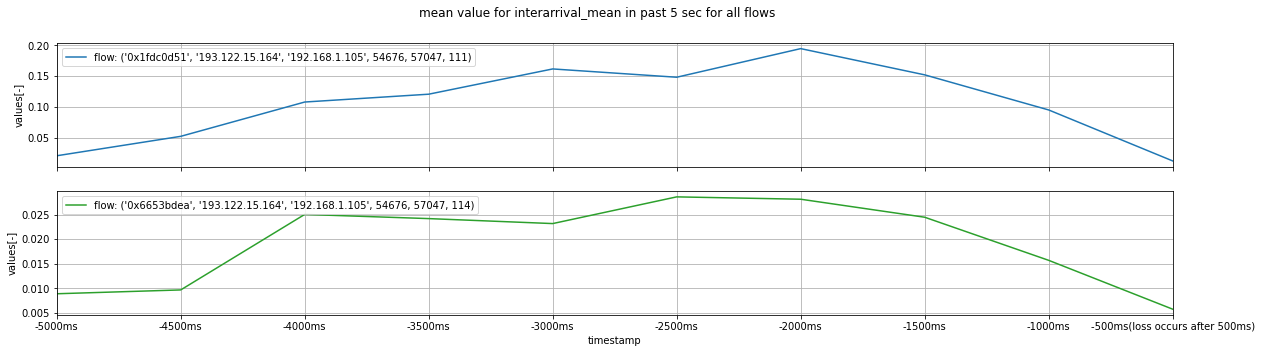

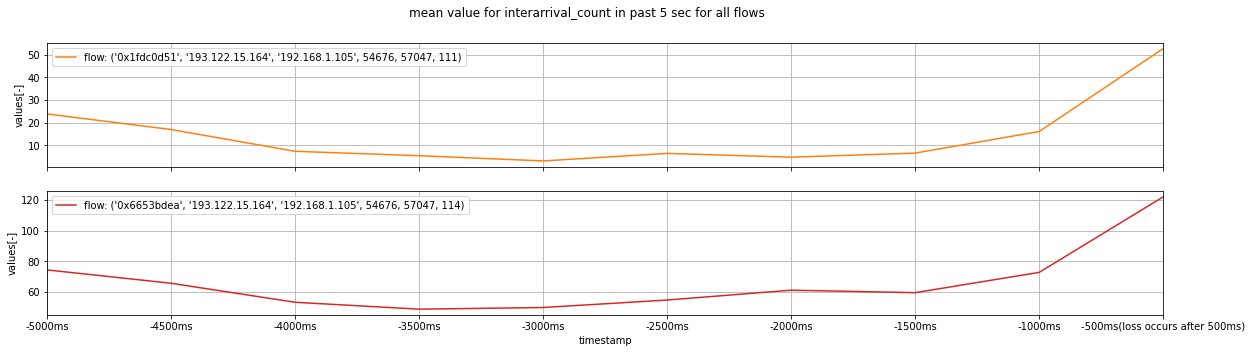

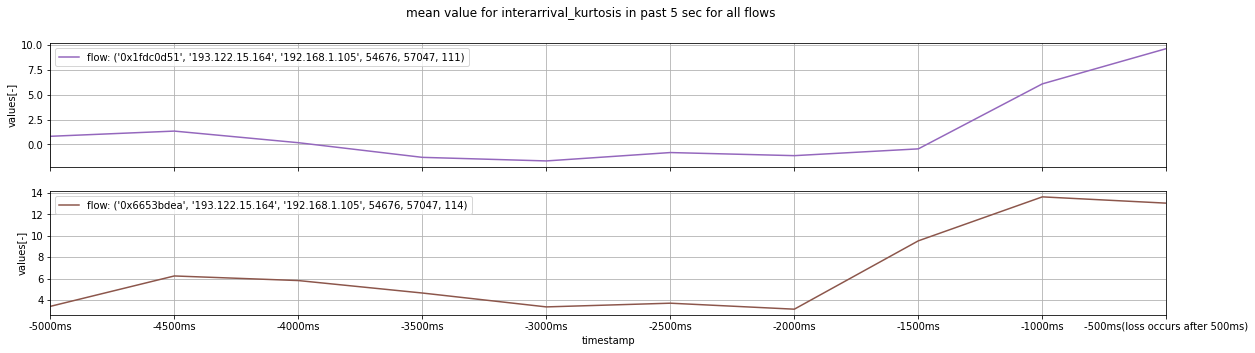

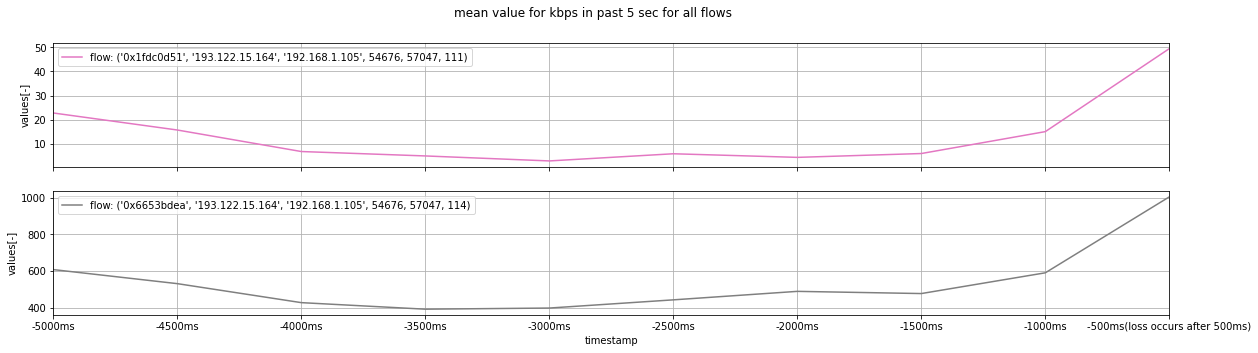

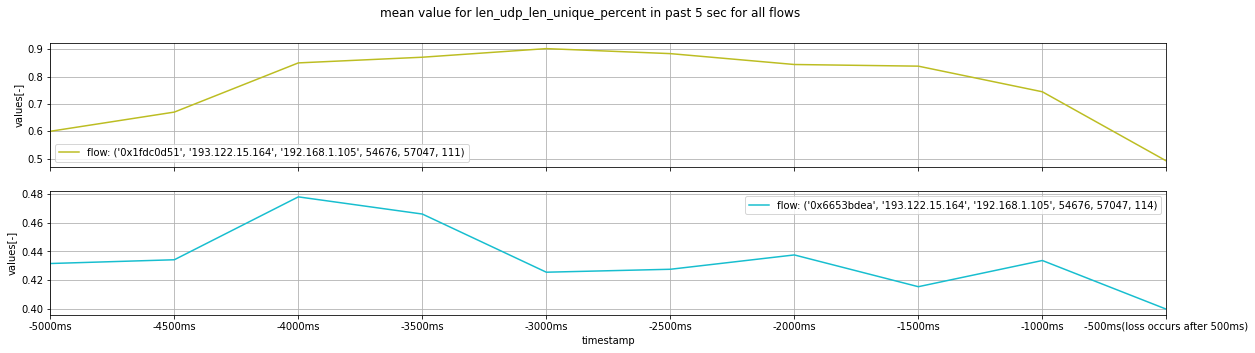

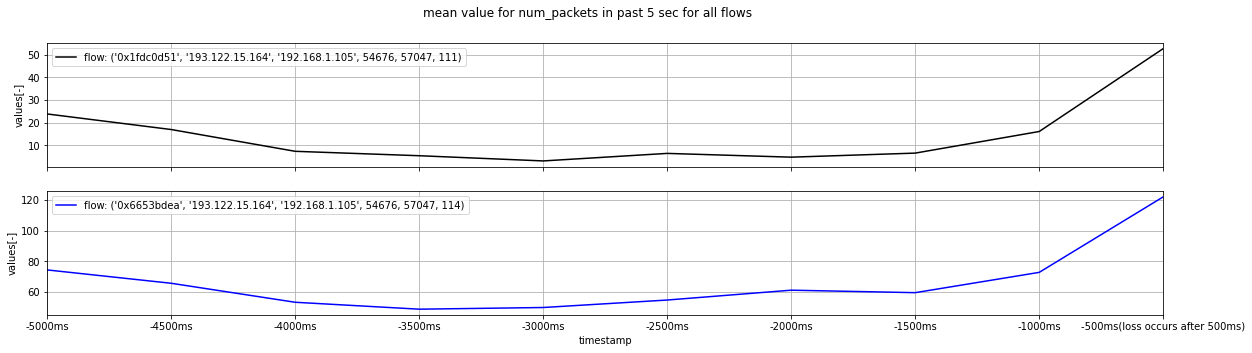

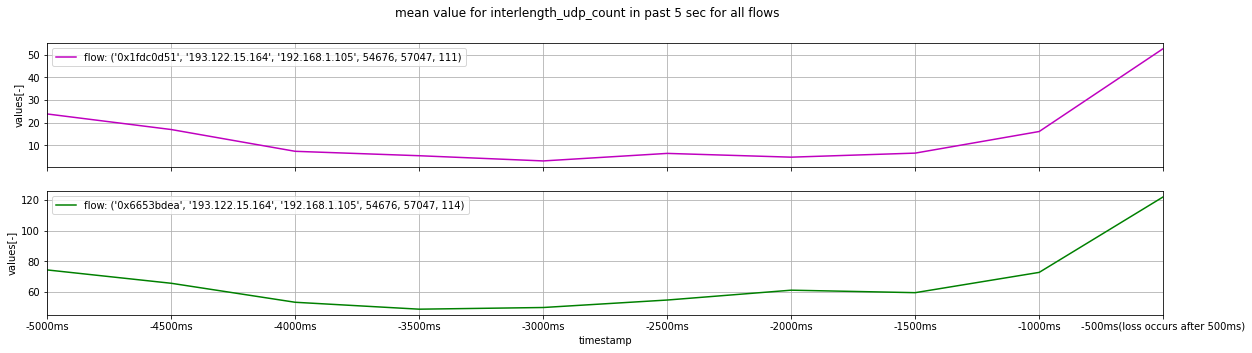

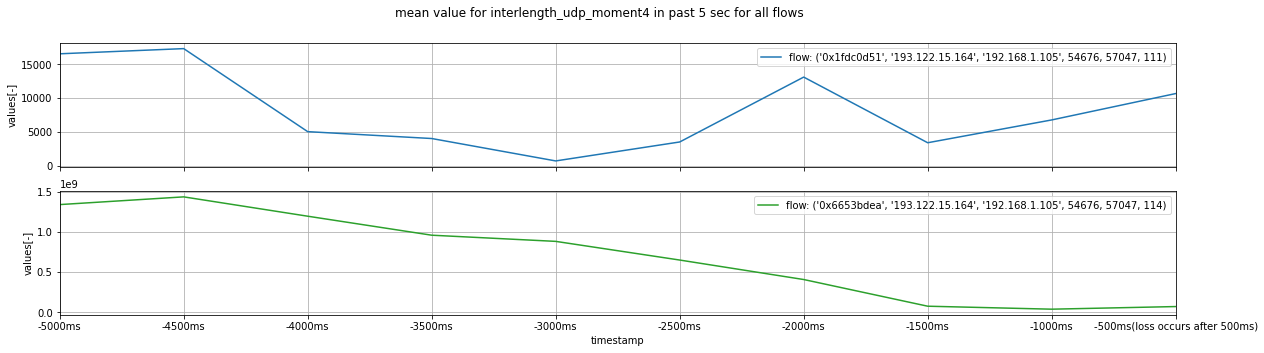

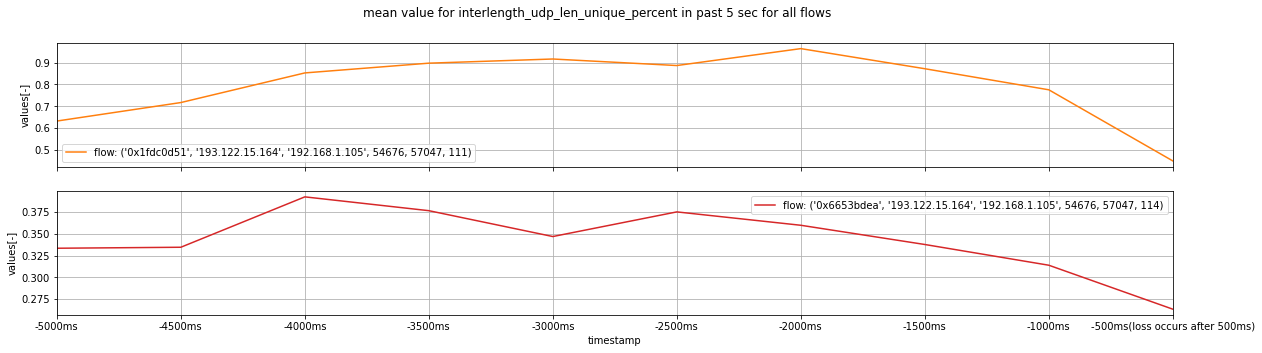

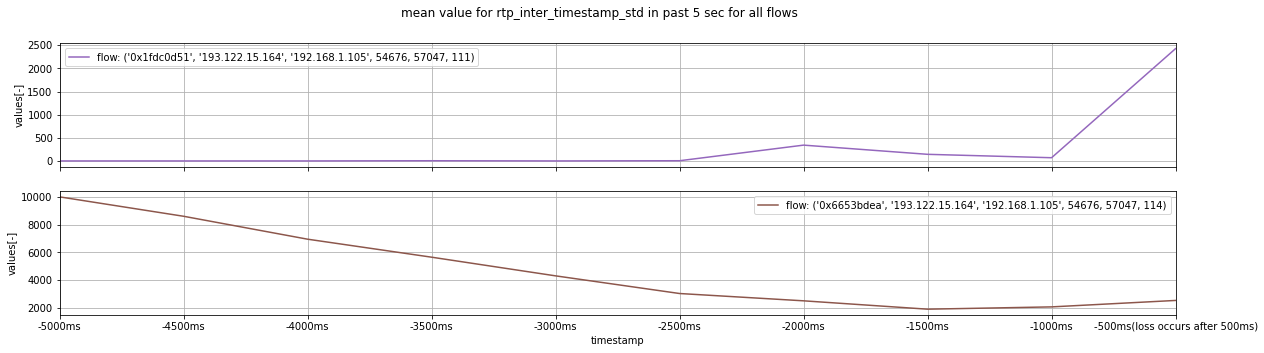

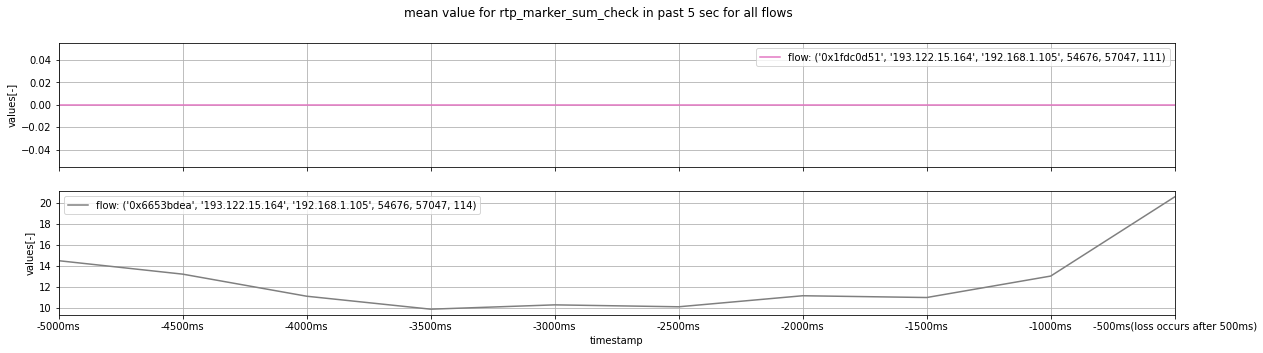

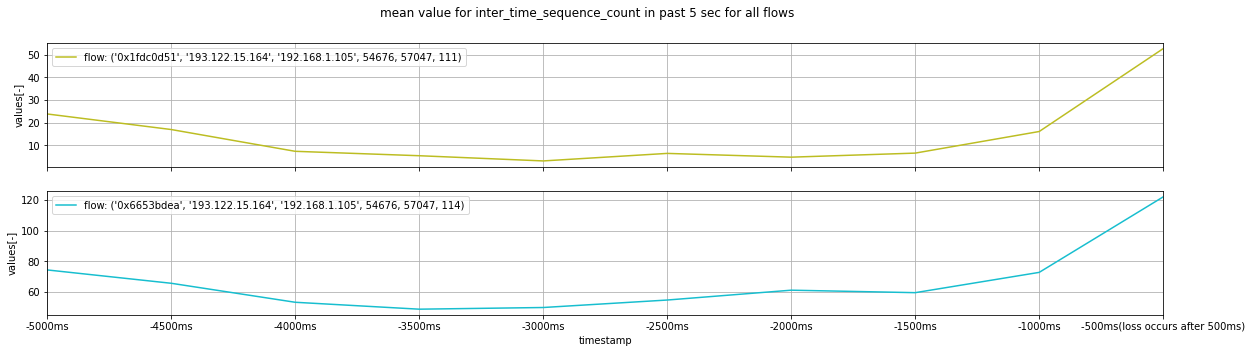

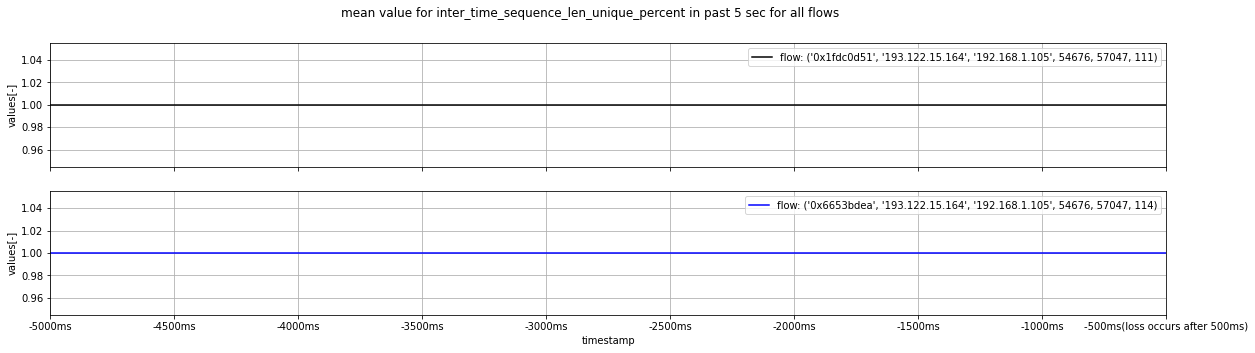

In [21]:
# at least one loss in the past 5s for a loss

dist_list = [i for i in range(1, 11)]
x_label_list = [f'-{500*i}ms' for i in range(1, 11)]
x_label_list[0] = f'{x_label_list[0]}(loss occurs after 500ms)'
x_label_list.reverse()

color_idx = 0
for feature in feature_list:
    idx = 0
    fig, axs = plt.subplots(len(df_total_final), figsize=(20,5), sharex=True)
    fig.suptitle(f'mean value for {feature} in past 5 sec for all flows')
    
    for df_per_flow in df_total_final:
        df_temp = copy.deepcopy(df_per_flow)
        loss_index_list = df_temp[df_temp['lossOrNot'] > 0].index
        loss_index_list_with_consecutive = []
        for i in range(len(loss_index_list)-1, 0, -1):
            if (loss_index_list[i] - loss_index_list[i-1]) in dist_list:
                loss_index_list_with_consecutive.append(loss_index_list[i])        
                
        if len(loss_index_list_with_consecutive) != 0:
            mean_stat_list = []
            std_stat_list = []
            window_size = 2 * 5 # 5sec
            for i in range(window_size, 0, -1):
                values = df_temp.iloc[[x - i for x in loss_index_list_with_consecutive]][feature]
                mean_stat_list.append(values.mean())
                std_stat_list.append(np.std(values))

            axs[idx].plot(x_label_list, mean_stat_list, color=color_for_plot_list[color_idx], label=f'flow: {flow_name_list[idx]}')
            axs[idx].grid(True)
            axs[idx].set_xlim(0, 9)
#             axs[idx].fill_between(x_label_list, np.array(mean_stat_list)-np.array(std_stat_list), np.array(mean_stat_list)+np.array(std_stat_list), color='lightsteelblue')
            axs[idx].legend()
            axs[idx].set_xlabel('timestamp')
            axs[idx].set_ylabel('values[-]')
            axs[idx].label_outer()
            if color_idx == len(color_for_plot_list)-1:
                color_idx = 0
            else:
                color_idx += 1
            
        idx += 1
         
    plt.show()

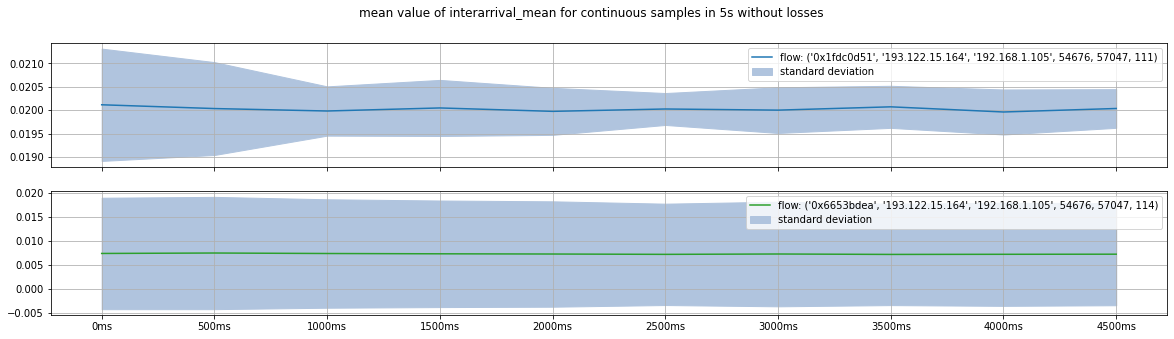

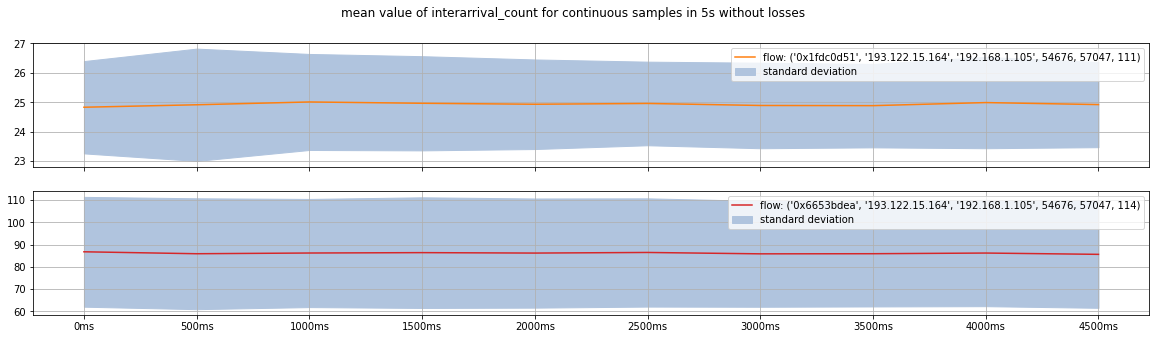

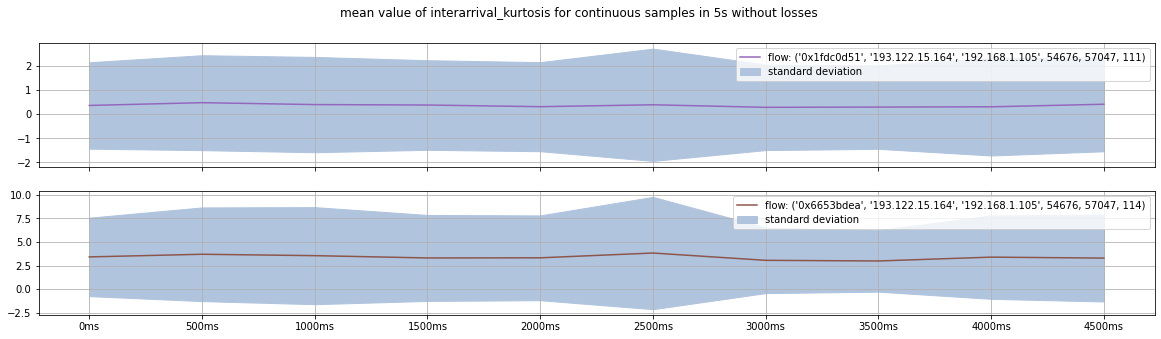

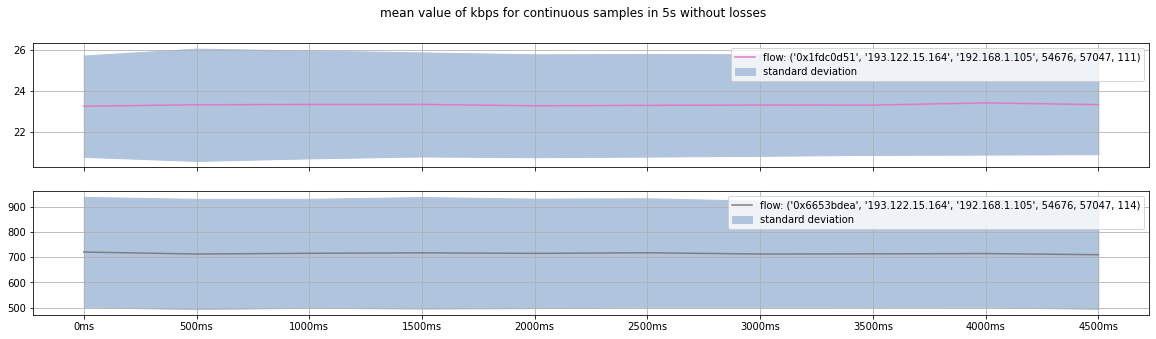

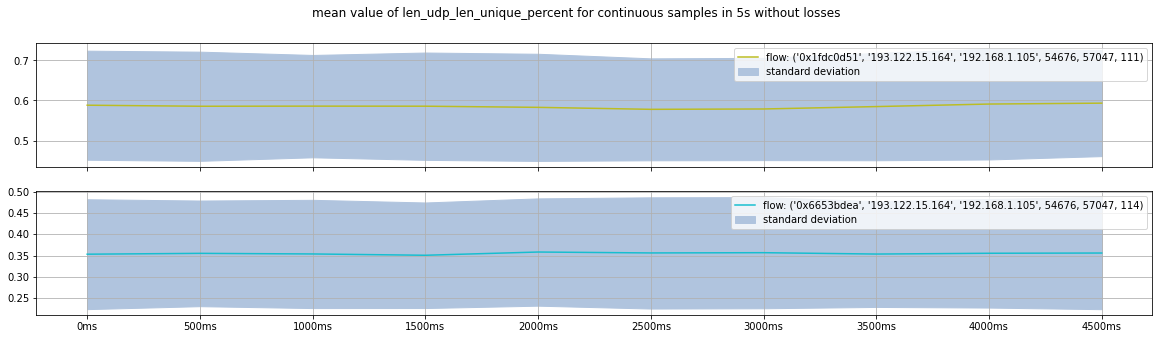

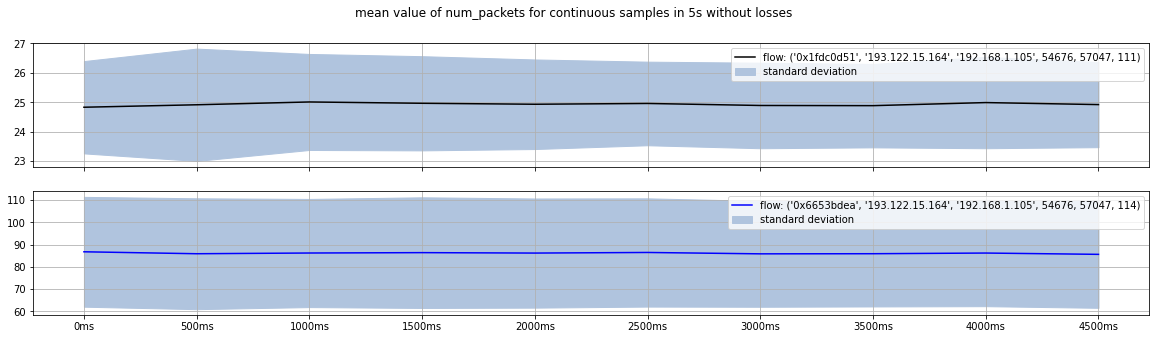

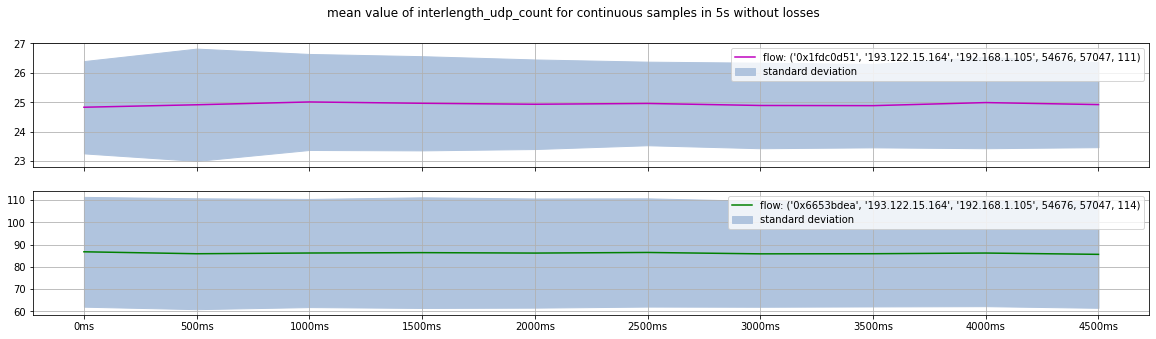

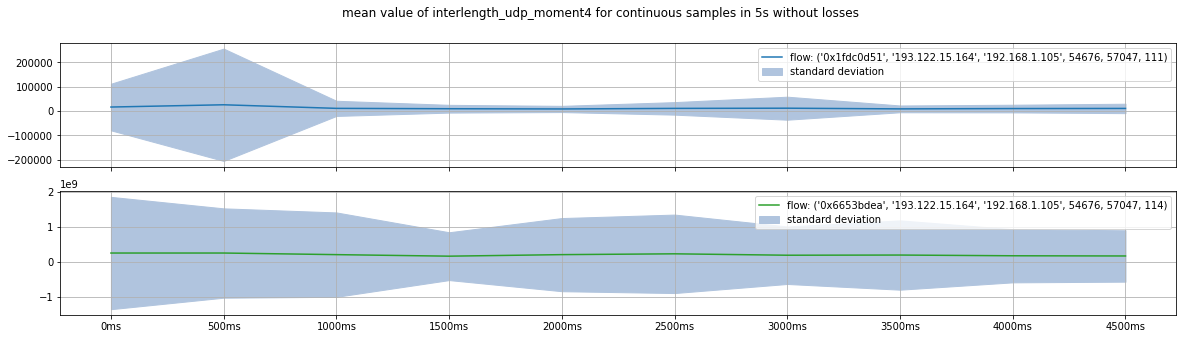

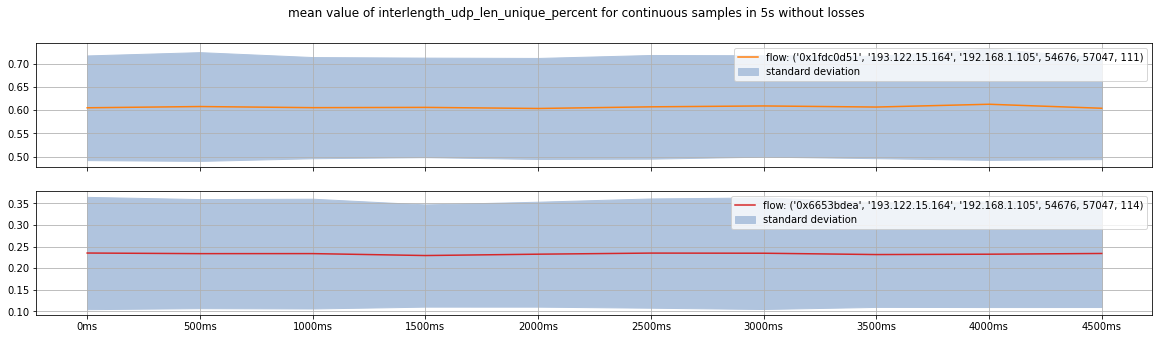

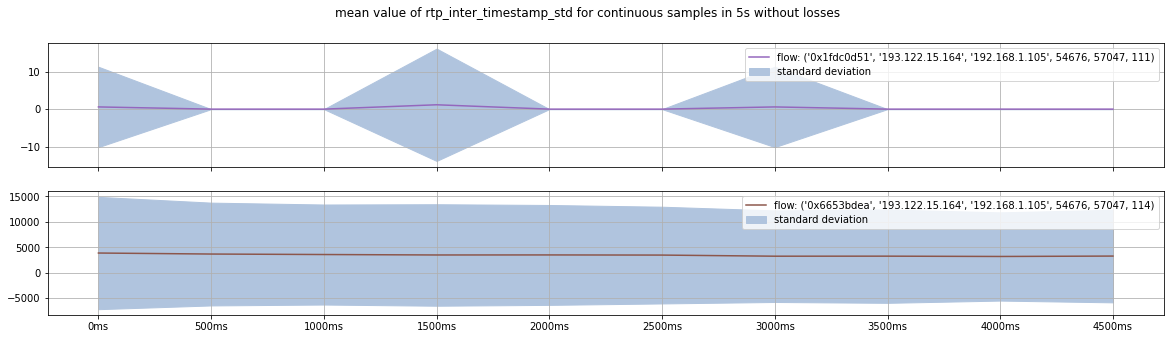

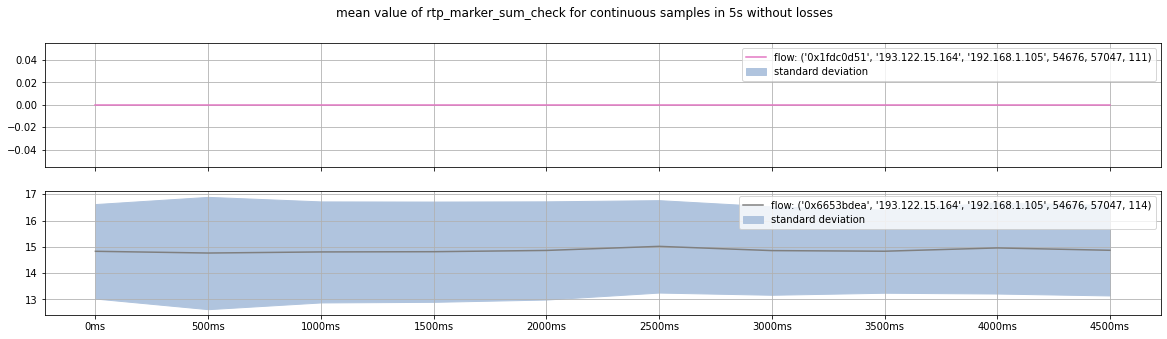

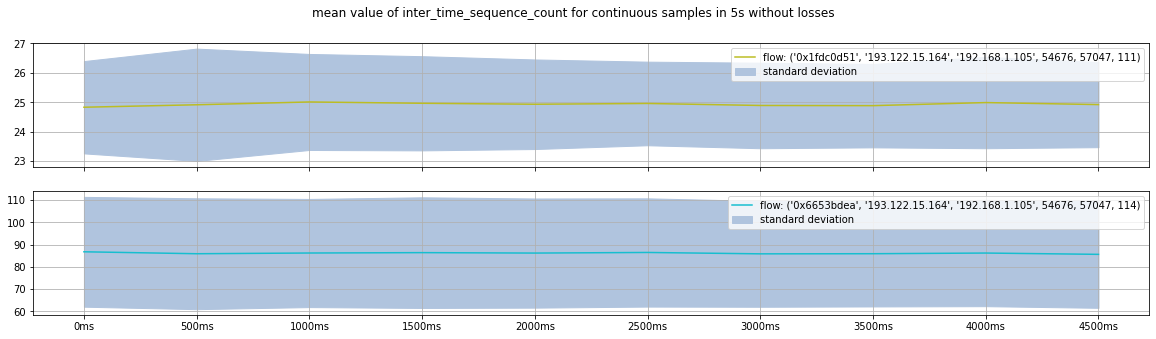

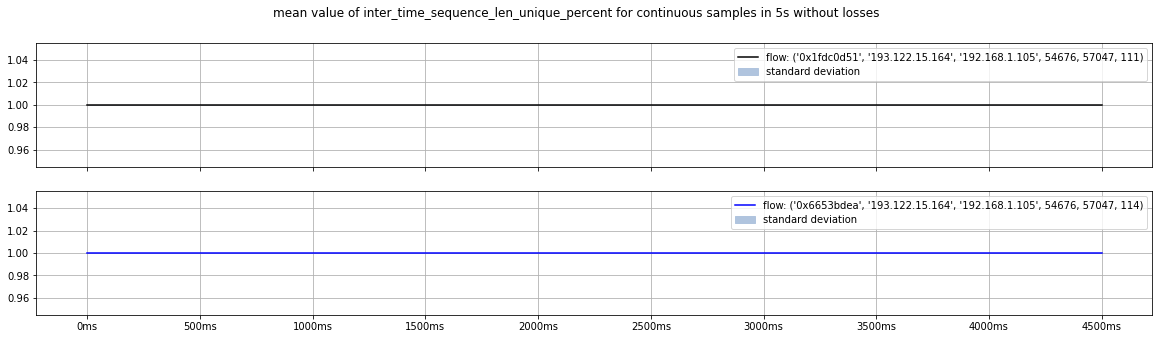

In [13]:
# continuous sample in 5 sec with no loss in the neighbourhood of 3 sec => 22 samples with no losses

x_label_list = [f'{500*i}ms' for i in range(0, 10)]
color_idx = 0

for feature in feature_list:
    idx = -1
    fig, axs = plt.subplots(len(df_total_final), figsize=(20,5), sharex=True)
    fig.suptitle(f'mean value of {feature} for continuous samples in 5s without losses')
    for df_per_flow in df_total_final:
        df_temp = copy.deepcopy(df_per_flow)
        idx += 1
        value_position = {}
        for i in range(1,11):
            value_position[str(i)] = []
        
        # deal with index
        all_index_list = df_temp.index.tolist()
        loss_index_list = df_temp[df_temp['lossOrNot'] > 0].index
        dropped_index_list = []
        for loss_idx in loss_index_list:
            for new_idx in range(loss_idx-3, loss_idx+4):
                if new_idx not in dropped_index_list:
                    dropped_index_list.append(new_idx)
        no_loss_idx_list = []
        for old_idx in all_index_list:
            if old_idx not in dropped_index_list:
                no_loss_idx_list.append(old_idx)
        idx_temp = 0
        while True:
            if idx_temp + 21 >= len(no_loss_idx_list):
                break
            if no_loss_idx_list[idx_temp+21] - no_loss_idx_list[idx_temp] == 21:
                inrea = 6
                for i in range(1,11):
                    value_position[str(i)].append(df_per_flow.iloc[no_loss_idx_list[idx_temp+inrea]][feature])
                    inrea += 1
                idx_temp += 22
            idx_temp += 1
        
        result_mean = []
        result_std = []
        for i in range(1,11):
            temp_array = np.array(value_position[str(i)])
            result_mean.append(temp_array.mean())
            result_std.append(np.std(temp_array))
        result_mean = np.array(result_mean)
        result_std = np.array(result_std)
            
        axs[idx].plot(x_label_list, result_mean, color=color_for_plot_list[color_idx], label=f'flow: {flow_name_list[idx]}')
        axs[idx].fill_between(x_label_list, result_mean-result_std, result_mean+result_std, color='lightsteelblue', label='standard deviation')
#         axs[idx].errorbar(x_label_list, result_mean, yerr=result_std, fmt='-o')
        axs[idx].legend()
        axs[idx].grid()
        if color_idx == len(color_for_plot_list)-1:
            color_idx = 0
        else:
            color_idx += 1
            
    plt.show()

## The following has been improved based on previous script and plz refer to these!!!

In [138]:
# improved Version

import copy
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [139]:
# colors for plot
color_for_plot_list = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'b', 'm', 'g']

# pick a random pcap and read csv file 
df_input = pd.read_csv('Retina/shared/Dataset_jitsi/Call_17_2p_meo/Jitsi_Meo_2p_av_2020_11_12_500ms_Song_no_log.csv')
# df_input = pd.read_csv('Retina/shared/Dataset_jitsi/Call_12_retina2_2p_avs_dena/jitsi_2p_avs_ss_outbound_retina2_2020_12_14_500ms_Song_no_log.csv')

In [140]:
# drop data with source being my end and drop useless columns

df_inter = copy.deepcopy(df_input)
df_inter = df_inter.loc[~df_inter['ip_src'].str.startswith('192')]
drop_col = ['software', 'label', 'pcap', 'ssrc', 'rtp_seq_num_packet_loss', 'ip_src', 'ip_dst', 'prt_src', 'prt_dst', 'rtp_csrc_csrc_agg', 'p_type']
for col in df_inter.columns:
    if col in drop_col or col.startswith('rtp_interarrival'): # maybe also for 'rtp_inter'
        df_inter.drop(col, axis=1, inplace=True)

In [141]:
# split data into flows and ignore flow with less than 100 samples

flow_list = df_inter[['flow']]['flow'].drop_duplicates().tolist()
df_total = []
for flow_id in flow_list:
    df_check = df_inter[df_inter['flow'] == flow_id].copy()
    if df_check.shape[0] > 1000:
        df_total.append(df_check)

In [143]:
# deal with missing values
# set missing values to be -0.01

df_total_final = []
flow_name_list = []
for df_per_flow in df_total:
    df_temp = copy.deepcopy(df_per_flow)
    df_temp.reset_index(inplace=True)
    df_temp['lossOrNot'] = [1 if x>0 else 0 for x in df_temp['num_packet_loss']]
    flow_name = str(df_temp["flow"].drop_duplicates().tolist())[2:-2]
    flow_name_list.append(flow_name)
    df_temp.drop(['index', 'flow', 'num_packet_loss'], axis=1, inplace=True)
    start_time = pd.to_datetime(df_temp['timestamp'].min())
    stop_time = pd.to_datetime(df_temp['timestamp'].max())
    timestamp_ser = pd.date_range(start_time, stop_time, freq="500L")
    correct_len = len(timestamp_ser)
    if df_temp.shape[0] == correct_len:
        df_full = df_temp.copy()
    else:
        print(f'it should be {correct_len}, but it is {df_temp.shape[0]}')
        df_temp['timestamp'] = pd.to_datetime(df_temp['timestamp'])
        df_full = pd.DataFrame({'timestamp': timestamp_ser})
        df_full['timestamp'] = df_full['timestamp']
        df_full = df_full.merge(df_temp, on='timestamp', how='left')
        
    df_total_final.append(df_full)

it should be 9471, but it is 9437
it should be 9471, but it is 9450


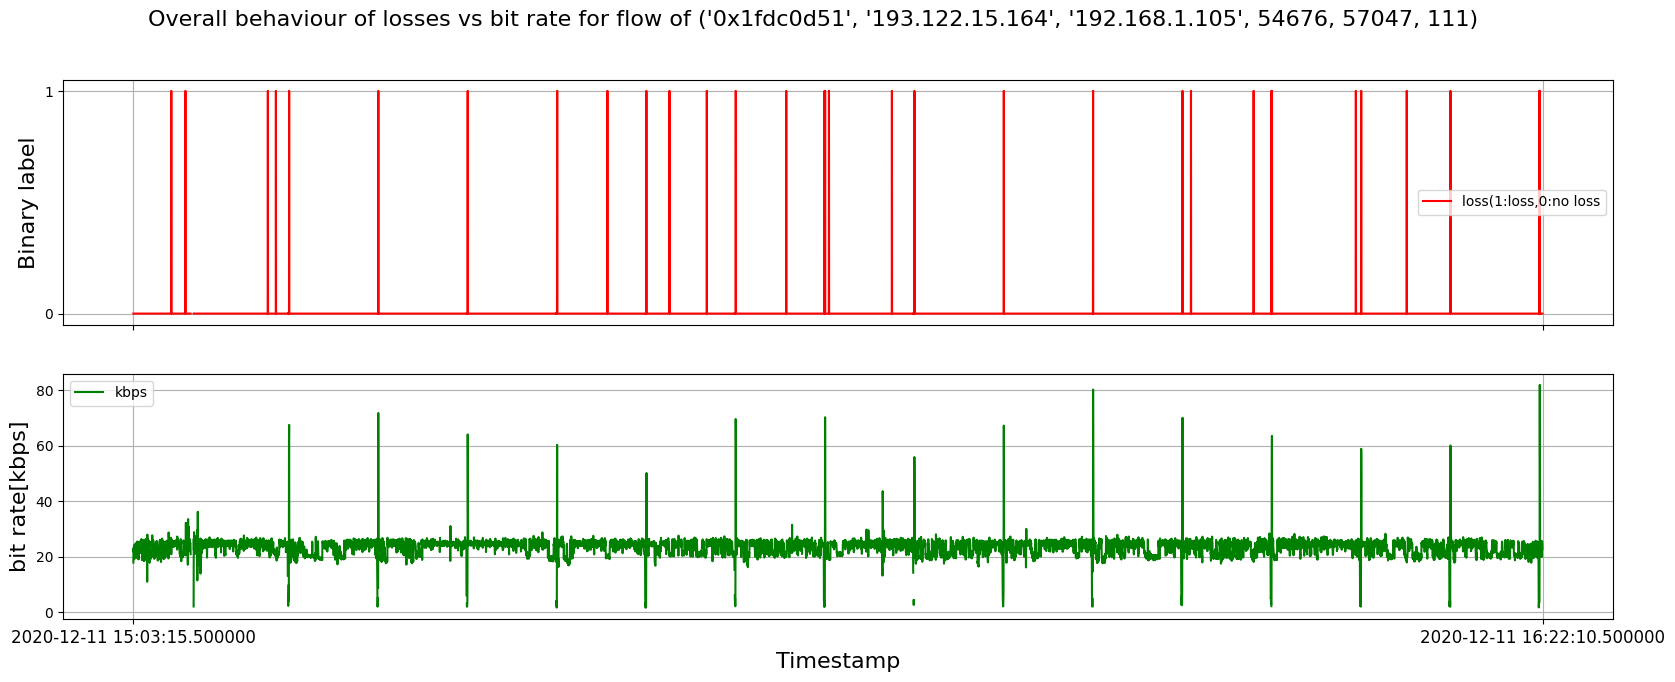

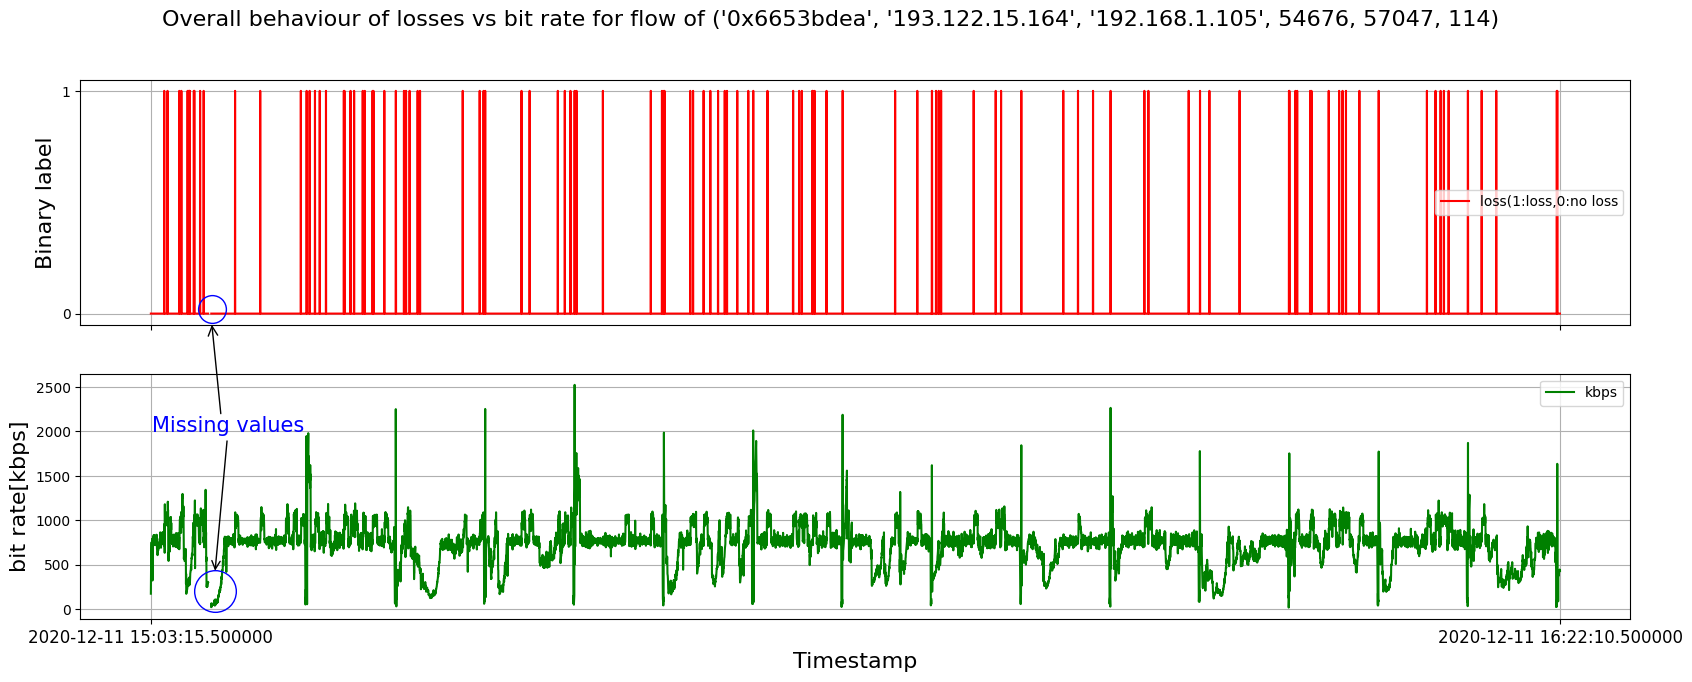

In [155]:
# check the overall behaviour for certain feature w.r.t. losses
# example bit rate (kbps)
# this is for 'Retina/shared/Dataset_jitsi/Call_17_2p_meo/Jitsi_Meo_2p_av_2020_11_12_500ms_Song_no_log.csv'

from matplotlib import patches

idx_flow_id = 0
for df_per_flow in df_total_final:
    df_temp = copy.deepcopy(df_per_flow)
    df_temp.reset_index(inplace=True)
    flow_id = flow_name_list[idx_flow_id]
    
    fig, axs = plt.subplots(2, figsize=(20, 7), sharex=True)
    fig.suptitle(f'Overall behaviour of losses vs bit rate for flow of {flow_id}', fontsize=16)
    axs[0].plot(df_temp['lossOrNot'], color='r', label='loss(1:loss,0:no loss')
    axs[0].legend()
    axs[0].set_yticks([0, 1])
    axs[0].set_ylabel('Binary label', fontsize=16)
    axs[0].grid()
    axs[1].plot(df_temp['kbps'], color='g', label='kbps')
    axs[1].set_xticks([0, len(df_temp['lossOrNot'])])
    axs[1].set_xticklabels([df_temp.iloc[0]['timestamp'],df_temp.iloc[-1]['timestamp']], fontsize=12)
    axs[1].legend()
    axs[1].set_xlabel('Timestamp', fontsize=16)
    axs[1].set_ylabel('bit rate[kbps]', fontsize=16)
    axs[1].grid()
    if idx_flow_id == 1:
        axs[0].plot(410, 0.02, 'o', ms=20, mec='b', mfc='none', mew=1)
        xyA = [410, -0.05]
        xyB = [470, 2200]
        arrow = patches.ConnectionPatch(
            xyB,
            xyA,
            coordsA = axs[1].transData,
            coordsB = axs[0].transData,
            color = "black",
            arrowstyle = "->",  
            mutation_scale = 17, 
            linewidth = 1,
        )
        fig.patches.append(arrow)
        axs[1].plot(430, 200, 'o', ms=30, mec='b', mfc='none', mew=1)
        axs[1].annotate(
            'Missing values', 
            xy = (430, 400), 
            xytext = (10, 2000),
            textcoords = 'data',
            color = 'blue', 
            size = 15,
            arrowprops = dict(arrowstyle="->", connectionstyle="arc3"),
        )
    plt.show()
    
    idx_flow_id += 1

In [19]:
# selected features for now

feature_list = [
    'interarrival_mean', 
    'interarrival_count', 
    'interarrival_kurtosis', 
    'kbps',
    'len_udp_len_unique_percent', 
    'num_packets',
    'interlength_udp_count', 
    'interlength_udp_moment4',
    'interlength_udp_len_unique_percent',
    'rtp_inter_timestamp_std',
    'rtp_marker_sum_check',
    'inter_time_sequence_count',
    'inter_time_sequence_len_unique_percent'
]

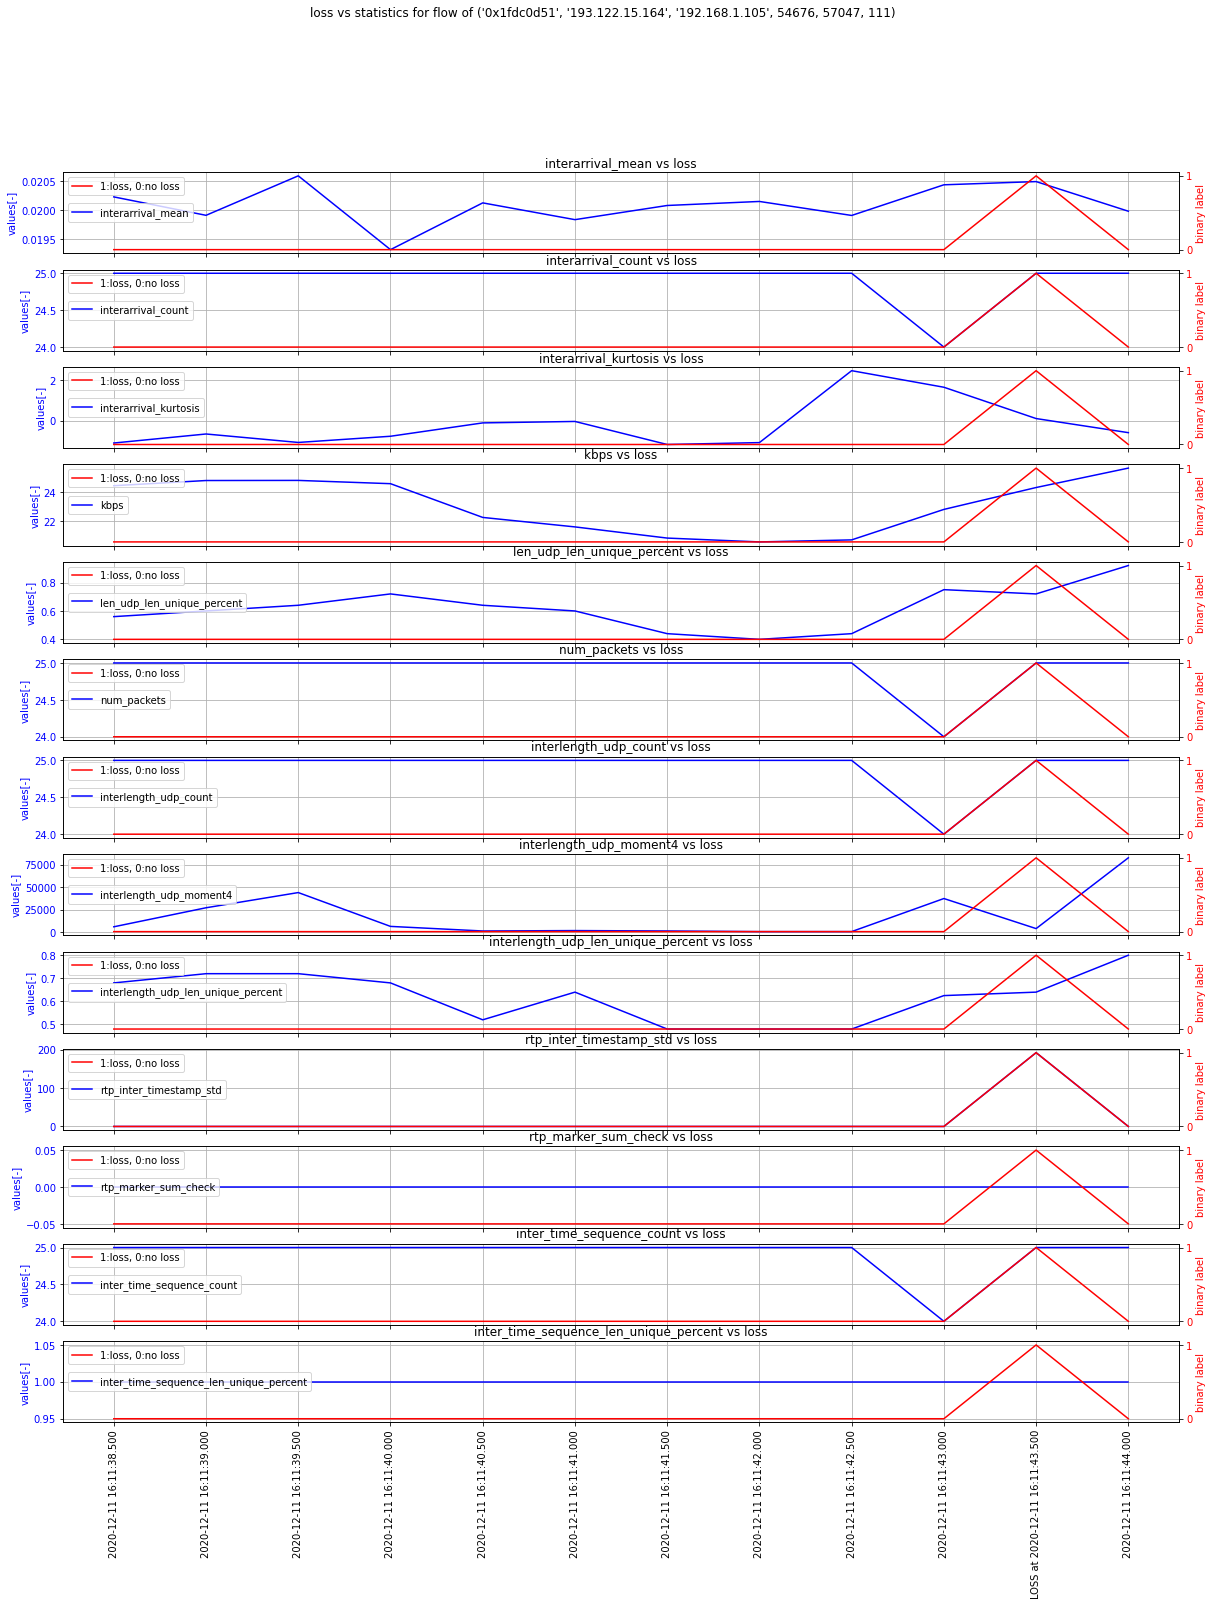

In [26]:
# a random loss with statistics in past 5 sec

idx_flow_id = 0
for df_per_flow in df_total_final:
    df_temp = copy.deepcopy(df_per_flow)
    idx_list = df_temp.index[df_temp['lossOrNot'] > 0].tolist()
    if len(idx_list) != 0:
        num_backward = 10
        loss_idx = idx_list[-6] 
        lossOrNot = df_temp.iloc[loss_idx-num_backward : loss_idx+2]['lossOrNot'].tolist()
        x_timestamp_label = df_temp.iloc[loss_idx-num_backward : loss_idx+2]['timestamp'].tolist()
        x_timestamp_label = [f'{x}'[0:19]+'.500' if len(str(x))>19 else f'{x}'[0:19]+'.000' for x in x_timestamp_label]
        x_timestamp_label[-2] = f'LOSS at {x_timestamp_label[-2]}'
        fig, axs = plt.subplots(len(feature_list), figsize=(20, 23), sharex=True)
        fig.suptitle(f'loss vs statistics for flow of {flow_name_list[idx_flow_id]}')
        for i in range(0, len(feature_list)):
            feature_values = df_temp.iloc[loss_idx-num_backward: loss_idx+2][feature_list[i]].tolist()
            axs[i].plot(x_timestamp_label, feature_values, color='blue', label=feature_list[i])
            axs[i].set_title(feature_list[i] + ' vs loss')
            axs[i].tick_params(axis='y', labelcolor='blue')
            axs[i].set_xticklabels(x_timestamp_label, rotation=90)
            axs[i].grid()
            axs[i].legend(loc=6)
            axs[i].set_ylabel('values[-]', color='blue')
            ax_loss = axs[i].twinx()
            ax_loss.plot(lossOrNot, color='r', label='1:loss, 0:no loss')
            ax_loss.tick_params(axis='y', labelcolor='r')
            ax_loss.set_ylabel('binary label', color='red')
            ax_loss.set_yticks([0, 1])
            ax_loss.legend(loc=2)
    idx_flow_id += 1
    
    break

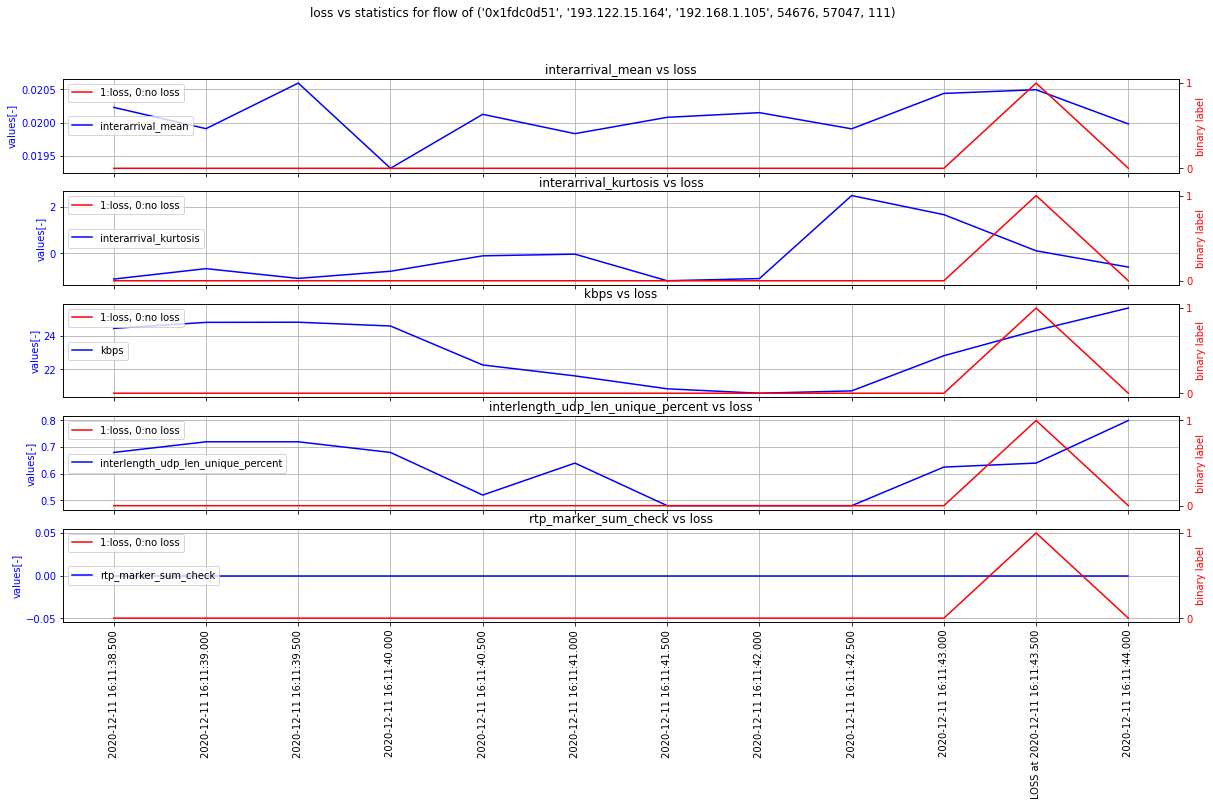

In [19]:
# a random loss with statistics in past 5 sec
# also for 'Retina/shared/Dataset_jitsi/Call_17_2p_meo/Jitsi_Meo_2p_av_2020_11_12_500ms_Song_no_log.csv'
# this is for a better plot in thesis

feature_list = [
    'interarrival_mean', 
    'interarrival_kurtosis', 
    'kbps',
    'interlength_udp_len_unique_percent',
    'rtp_marker_sum_check'
]

idx_flow_id = 0
for df_per_flow in df_total_final:
    df_temp = copy.deepcopy(df_per_flow)
    idx_list = df_temp.index[df_temp['lossOrNot'] > 0].tolist()
    if len(idx_list) != 0:
        num_backward = 10
        loss_idx = idx_list[-6] 
        lossOrNot = df_temp.iloc[loss_idx-num_backward : loss_idx+2]['lossOrNot'].tolist()
        x_timestamp_label = df_temp.iloc[loss_idx-num_backward : loss_idx+2]['timestamp'].tolist()
        x_timestamp_label = [f'{x}'[0:19]+'.500' if len(str(x))>19 else f'{x}'[0:19]+'.000' for x in x_timestamp_label]
        x_timestamp_label[-2] = f'LOSS at {x_timestamp_label[-2]}'
        fig, axs = plt.subplots(len(feature_list), figsize=(20, 10), sharex=True)
        fig.suptitle(f'loss vs statistics for flow of {flow_name_list[idx_flow_id]}')
        for i in range(0, len(feature_list)):
            feature_values = df_temp.iloc[loss_idx-num_backward: loss_idx+2][feature_list[i]].tolist()
            axs[i].plot(x_timestamp_label, feature_values, color='blue', label=feature_list[i])
            axs[i].set_title(feature_list[i] + ' vs loss')
            axs[i].tick_params(axis='y', labelcolor='blue')
            axs[i].set_xticklabels(x_timestamp_label, rotation=90)
            axs[i].grid()
            axs[i].legend(loc=6)
            axs[i].set_ylabel('values[-]', color='blue')
            ax_loss = axs[i].twinx()
            ax_loss.plot(lossOrNot, color='r', label='1:loss, 0:no loss')
            ax_loss.tick_params(axis='y', labelcolor='r')
            ax_loss.set_ylabel('binary label', color='red')
            ax_loss.set_yticks([0, 1])
            ax_loss.legend(loc=2)
    idx_flow_id += 1
    
    break

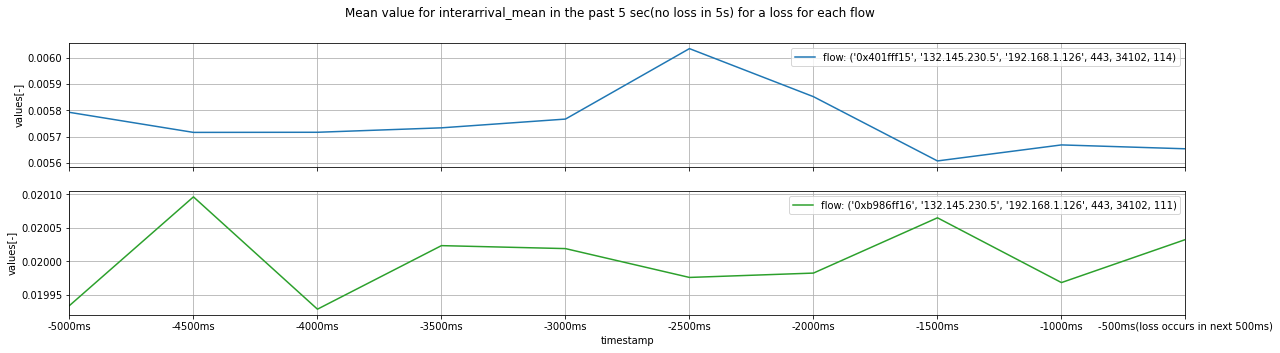

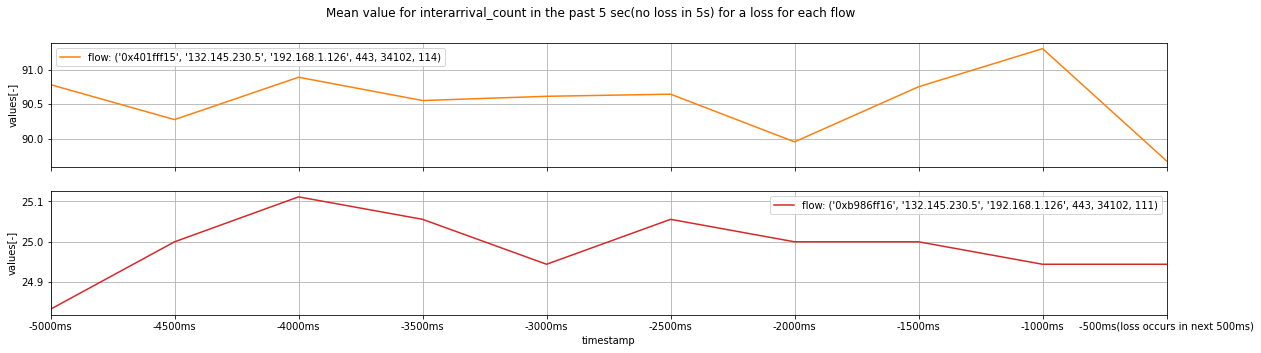

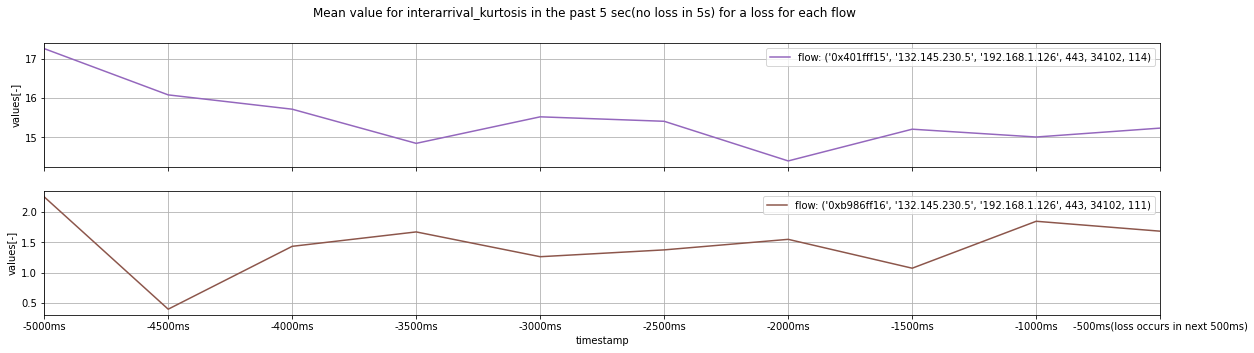

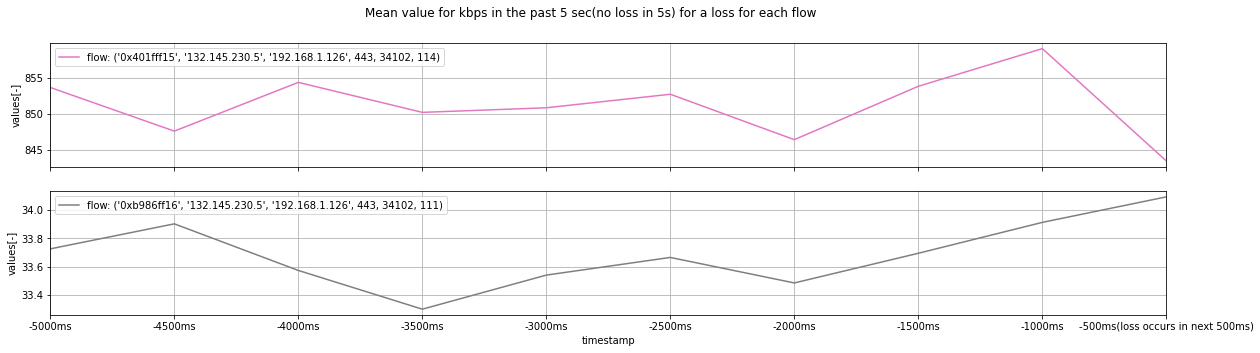

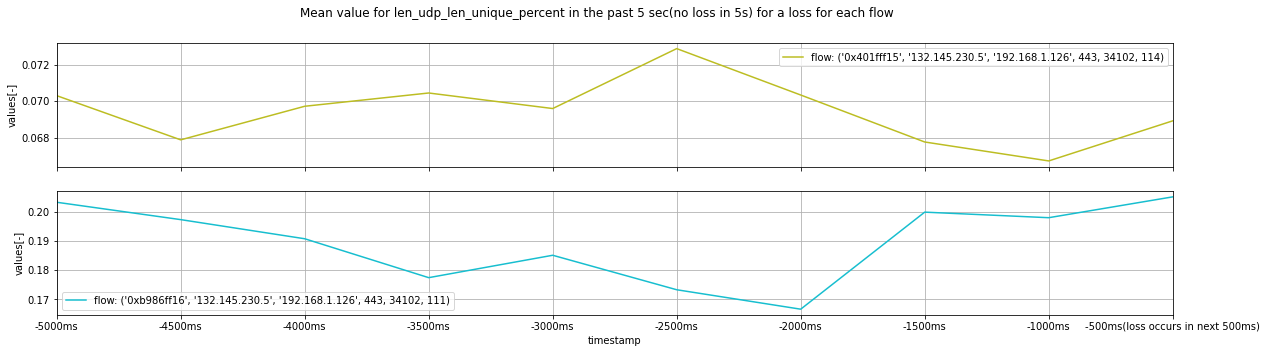

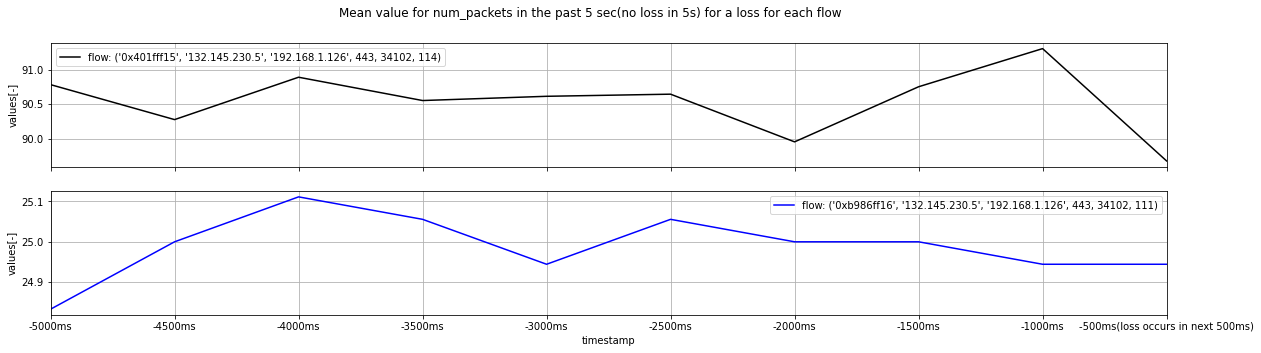

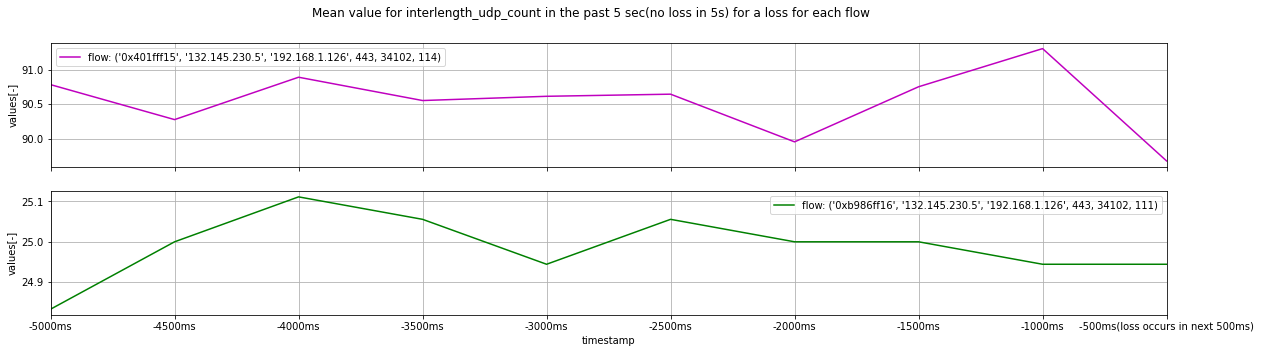

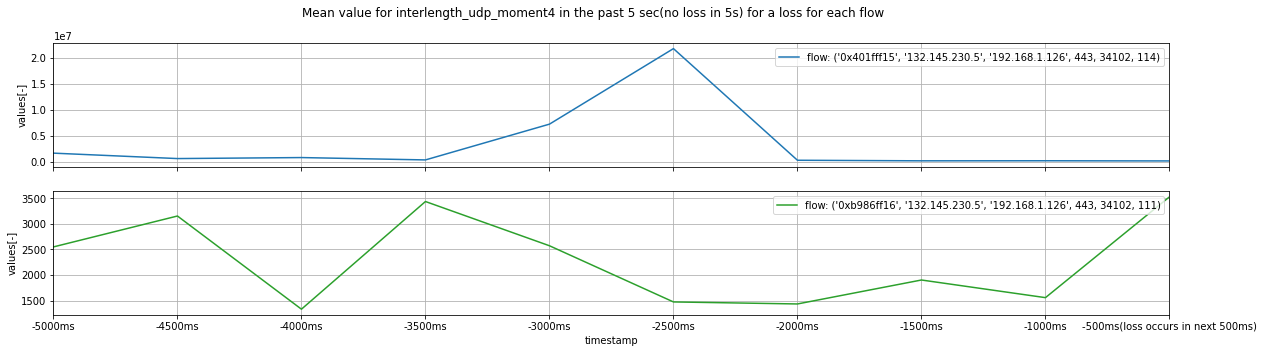

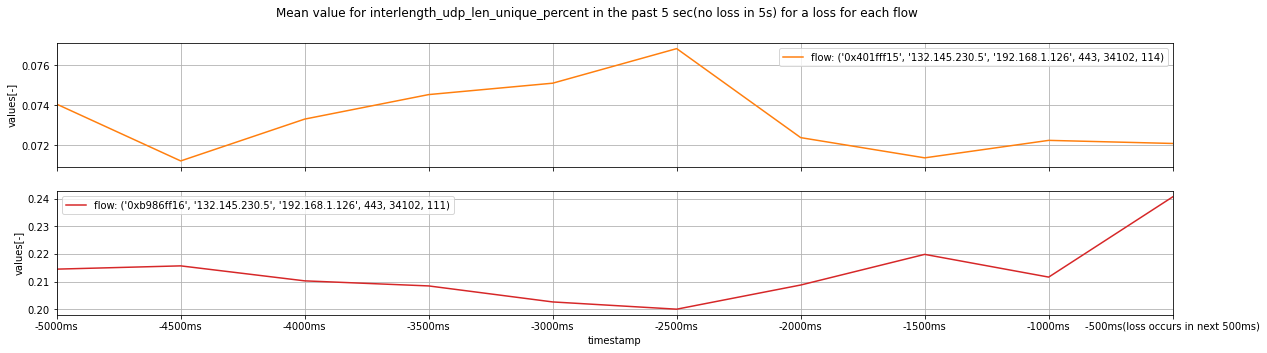

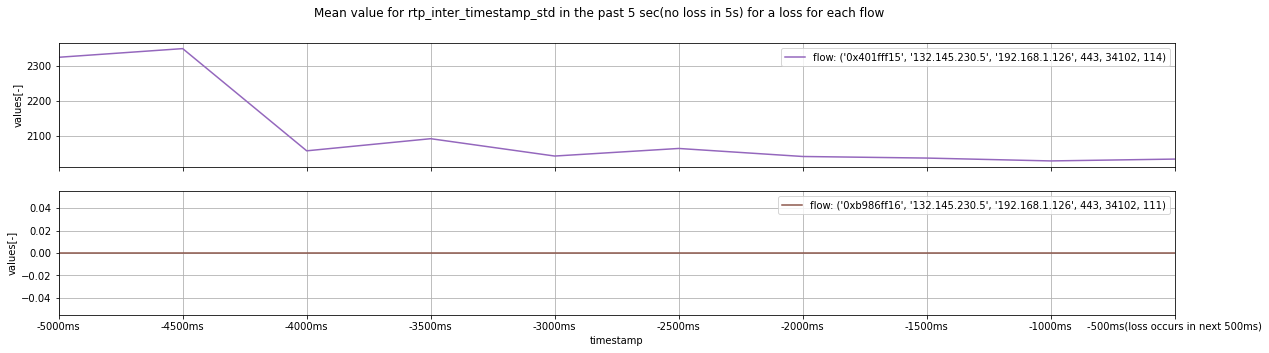

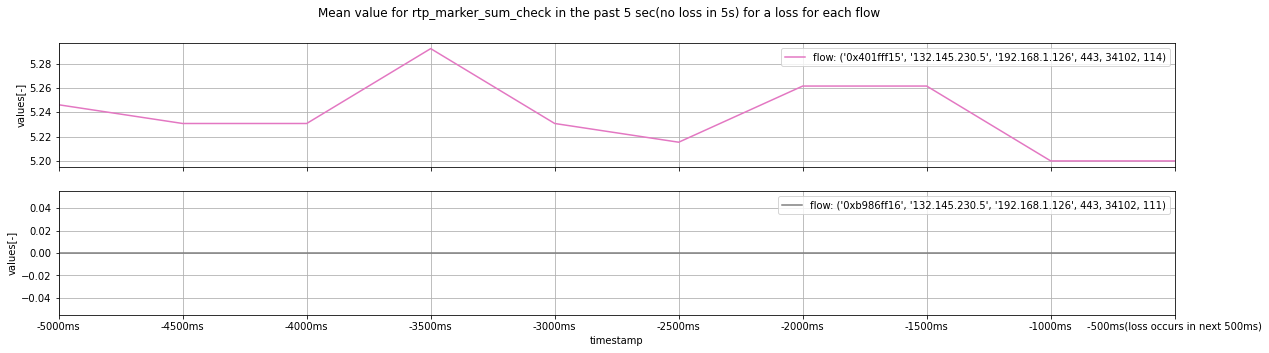

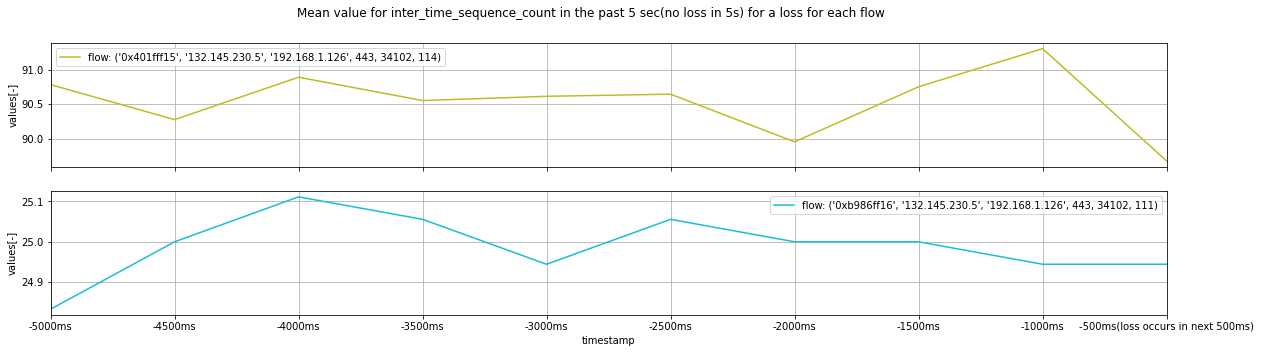

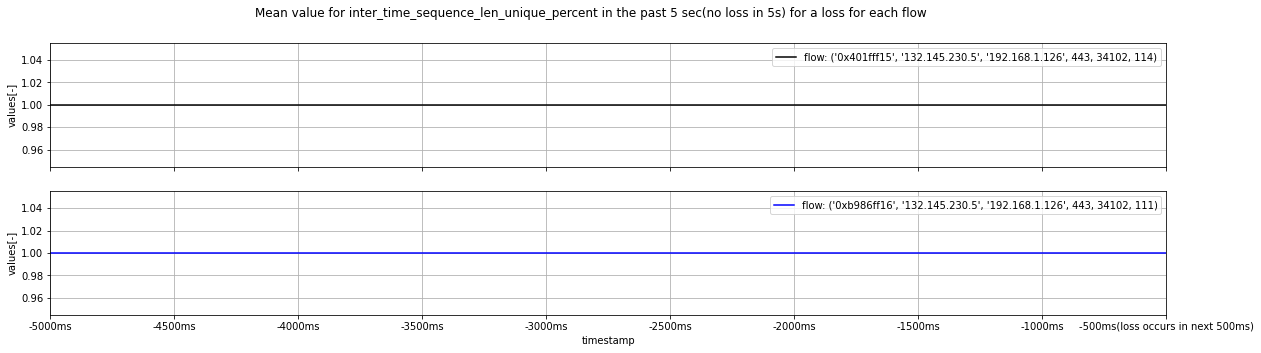

In [32]:
# average behaviour witth no loss in the past 5s for a loss

dist_list = [i for i in range(1, 11)]
x_label_list = [f'-{500*i}ms' for i in range(1, 11)]
x_label_list[0] = f'{x_label_list[0]}(loss occurs in next 500ms)'
x_label_list.reverse()

color_idx = 0
for feature in feature_list:
    idx = 0
    fig, axs = plt.subplots(len(df_total_final), figsize=(20,5), sharex=True)
    fig.suptitle(f'Mean value for {feature} in the past 5 sec(no loss in 5s) for a loss for each flow')
    
    for df_per_flow in df_total_final:
        df_temp = copy.deepcopy(df_per_flow)
        loss_index_list = df_temp[df_temp['lossOrNot'] > 0].index
        if len(loss_index_list) != 0:
            loss_index_list_no_consecutive = []
            for i in range(len(loss_index_list)-1, 0, -1):
                if (loss_index_list[i] - loss_index_list[i-1]) not in dist_list:
                    loss_index_list_no_consecutive.append(loss_index_list[i])
            loss_index_list_no_consecutive.append(loss_index_list[0])
            
            loss_index_list_no_consecutive_final = []
            for loss_idx in loss_index_list_no_consecutive:
                if loss_idx >= 10:
                    temp_values_list = df_temp.iloc[loss_idx-10:loss_idx][feature]
                    if temp_values_list.isnull().sum() == 0:
                        loss_index_list_no_consecutive_final.append(loss_idx)

            mean_stat_list = []
            std_stat_list = []
            window_size = 2 * 5 # 5sec
            for i in range(window_size, 0, -1):
                values = df_temp.iloc[[x - i for x in loss_index_list_no_consecutive_final]][feature]
                mean_stat_list.append(values.mean())
                std_stat_list.append(np.std(values))
            
            axs[idx].plot(x_label_list, mean_stat_list, color=color_for_plot_list[color_idx], label=f'flow: {flow_name_list[idx]}')
            axs[idx].grid()
            axs[idx].set_xlim(0, 9)
            axs[idx].legend()
            axs[idx].set_xlabel('timestamp')
            axs[idx].set_ylabel('values[-]')
            axs[idx].label_outer()
            if color_idx == len(color_for_plot_list)-1:
                color_idx = 0
            else:
                color_idx += 1
            
        idx += 1
         
    plt.show()

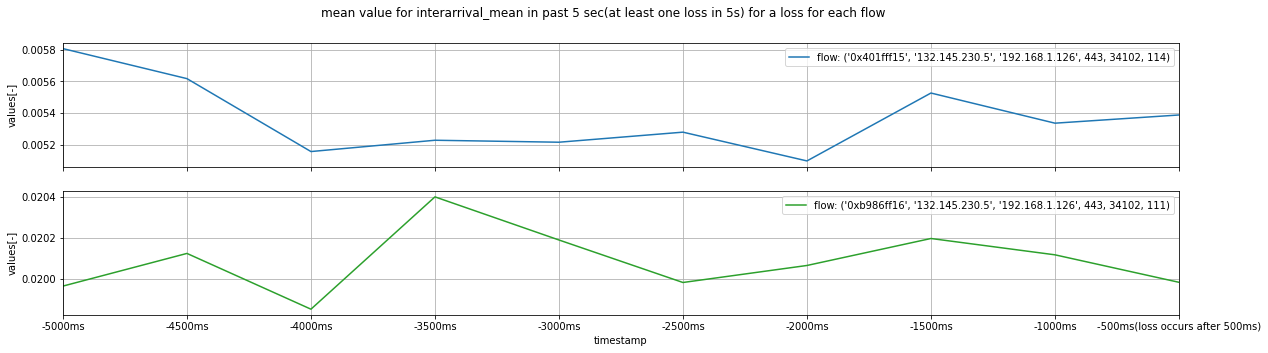

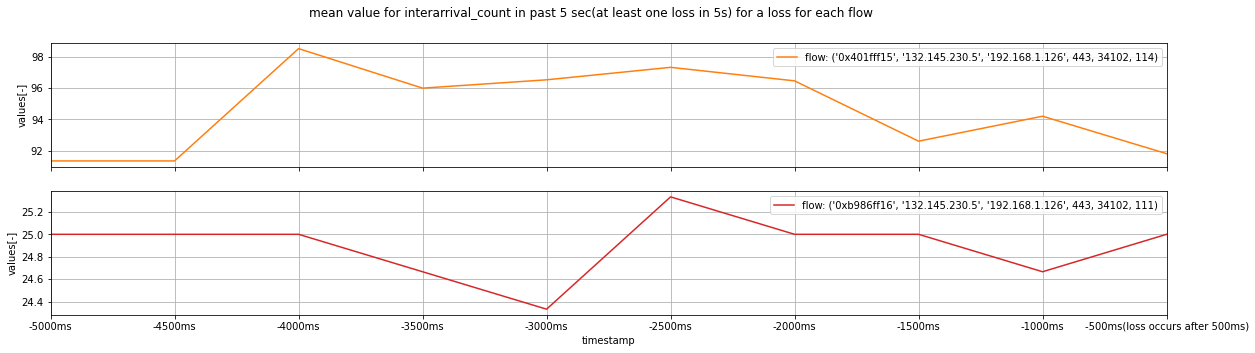

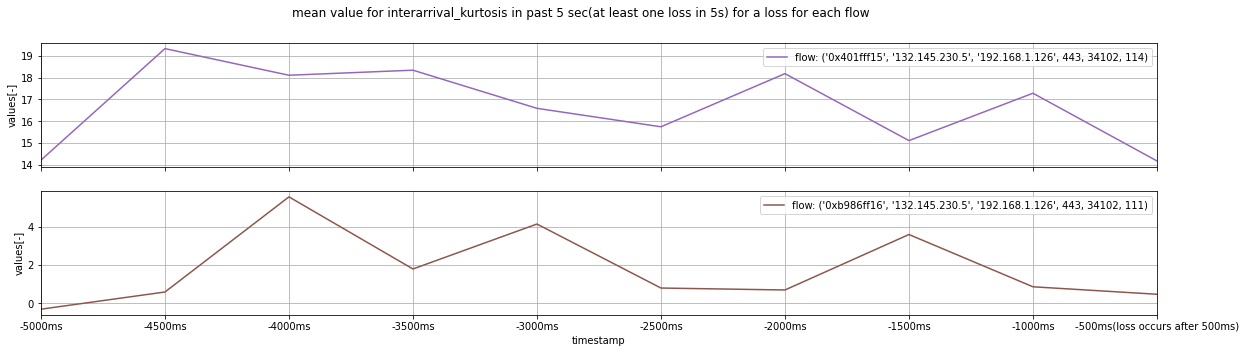

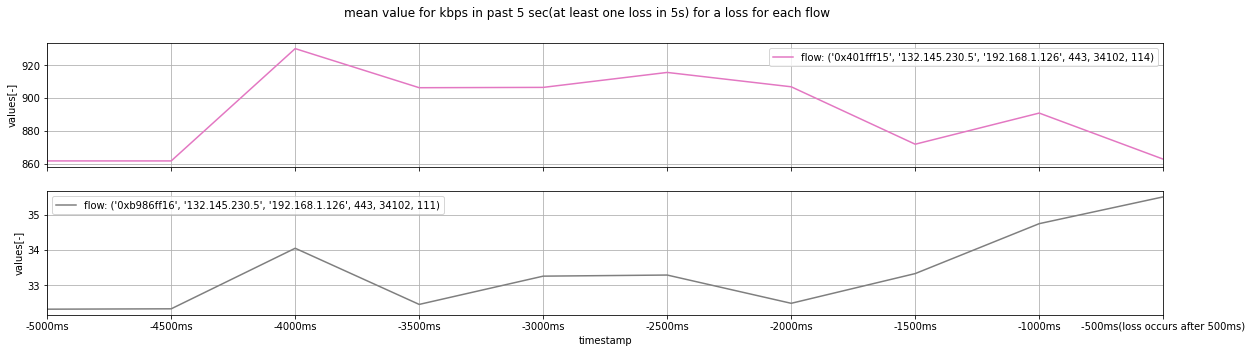

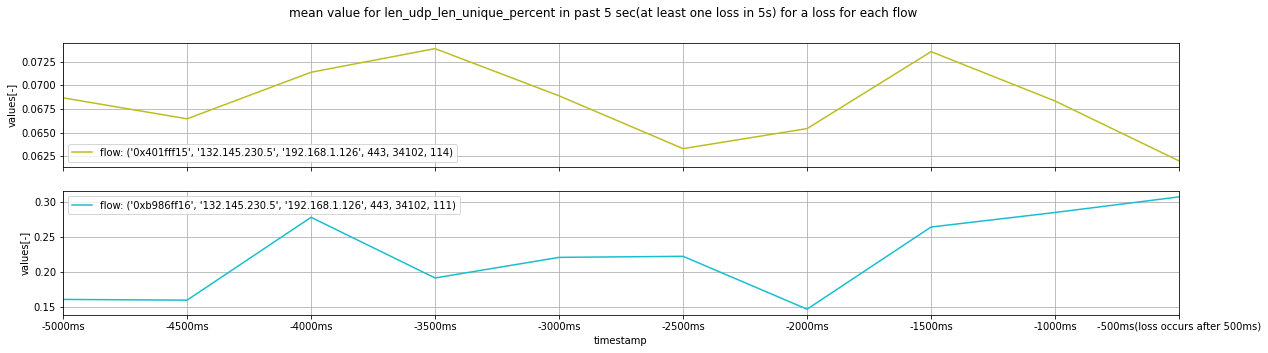

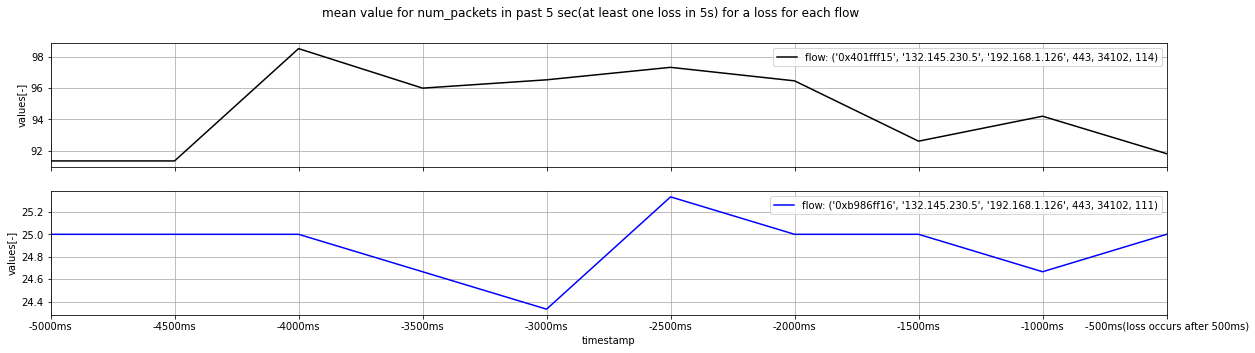

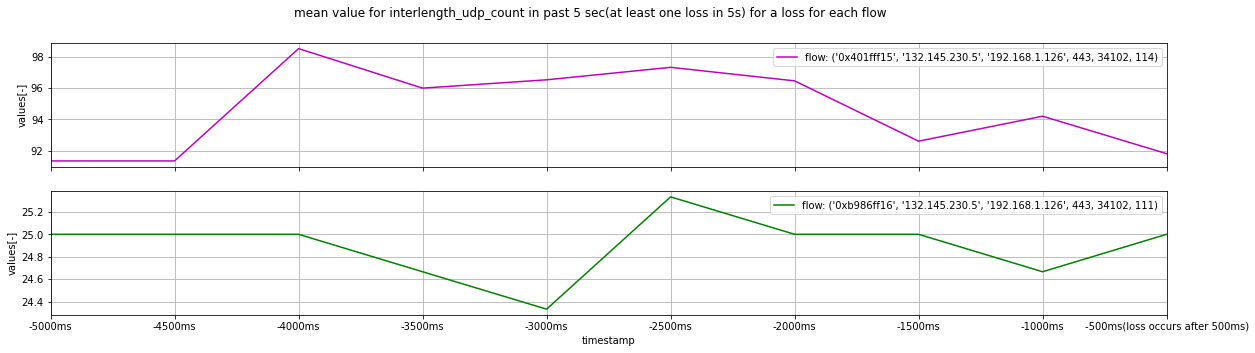

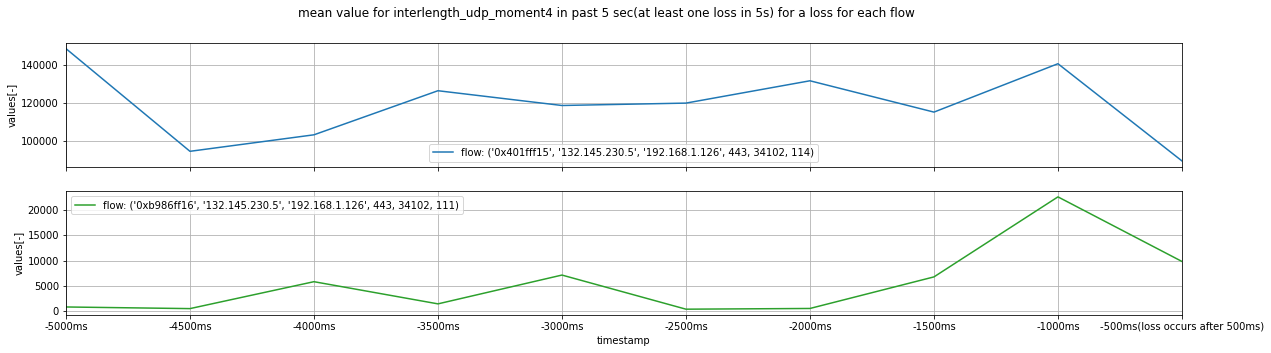

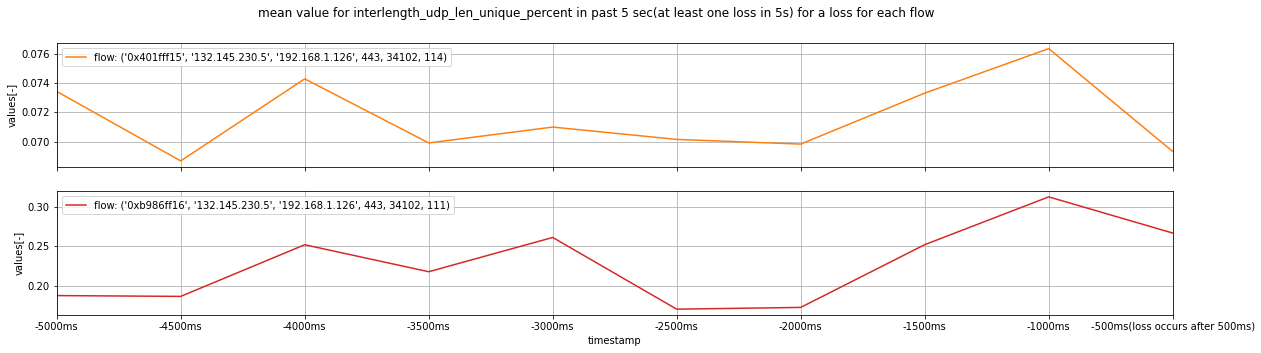

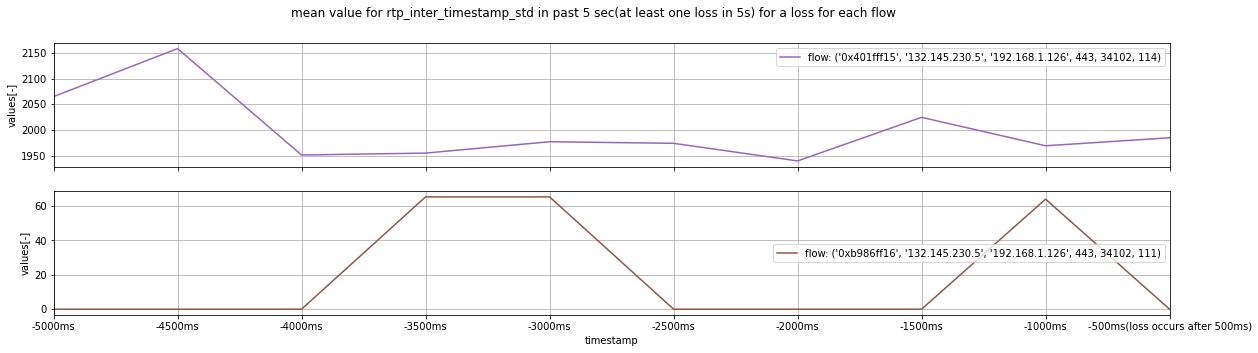

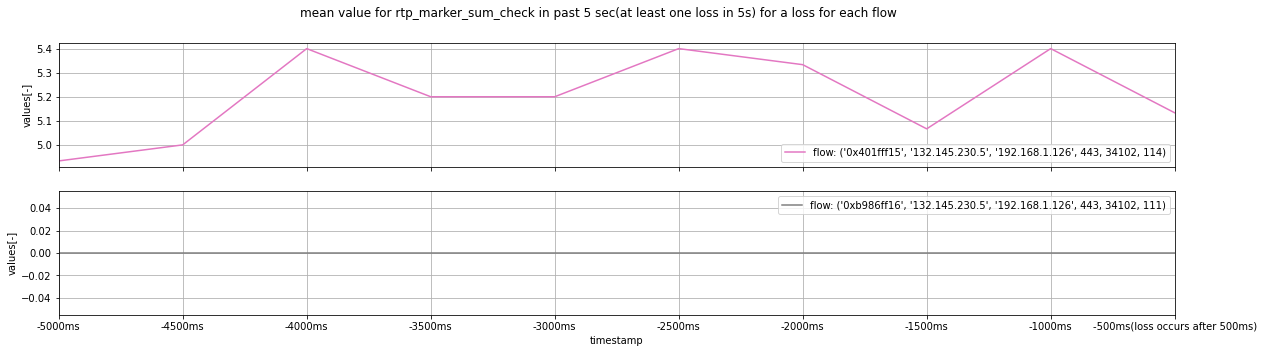

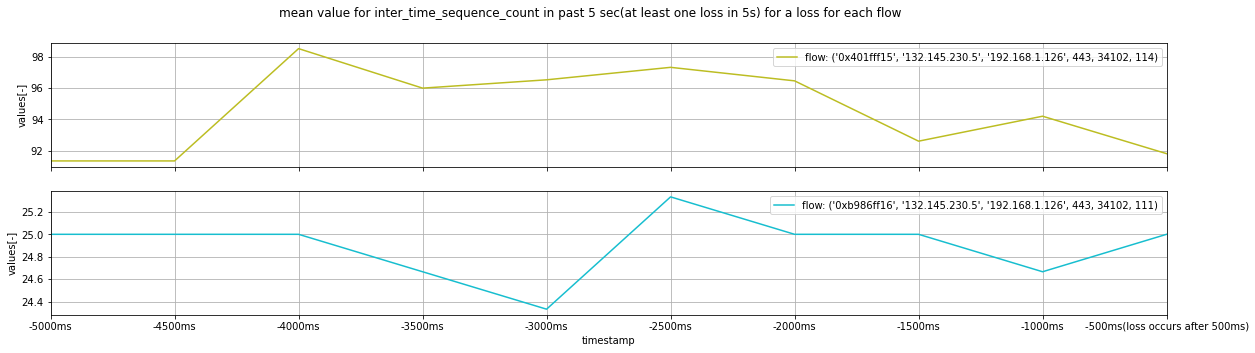

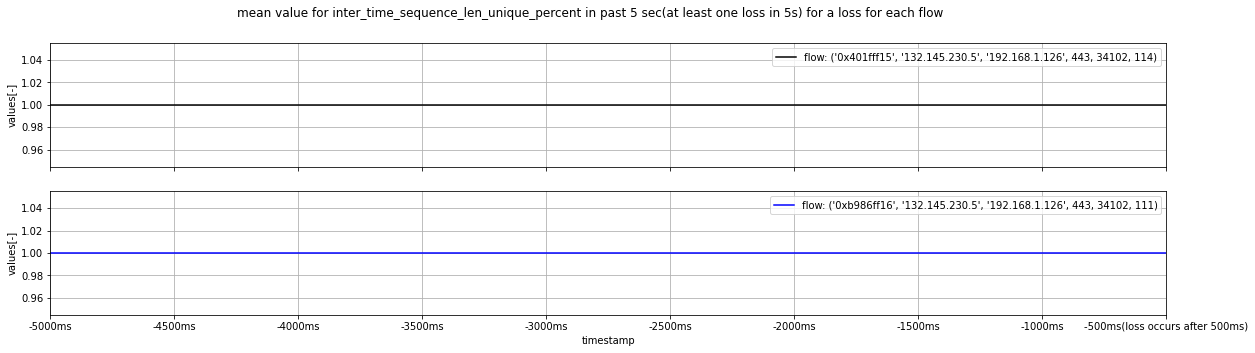

In [33]:
# at least one loss in the past 5s for a loss

dist_list = [i for i in range(1, 11)]
x_label_list = [f'-{500*i}ms' for i in range(1, 11)]
x_label_list[0] = f'{x_label_list[0]}(loss occurs after 500ms)'
x_label_list.reverse()

color_idx = 0
for feature in feature_list:
    idx = 0
    fig, axs = plt.subplots(len(df_total_final), figsize=(20,5), sharex=True)
    fig.suptitle(f'mean value for {feature} in past 5 sec(at least one loss in 5s) for a loss for each flow')
    
    for df_per_flow in df_total_final:
        df_temp = copy.deepcopy(df_per_flow)
        loss_index_list = df_temp[df_temp['lossOrNot'] > 0].index
        loss_index_list_with_consecutive = []
        for i in range(len(loss_index_list)-1, 0, -1):
            if (loss_index_list[i] - loss_index_list[i-1]) in dist_list:
                loss_index_list_with_consecutive.append(loss_index_list[i])   
                
        if len(loss_index_list_with_consecutive) != 0:
            loss_index_list_with_consecutive_final = []
            for loss_idx in loss_index_list_with_consecutive:
                if loss_idx >= 10:
                    temp_values_list = df_temp.iloc[loss_idx-10:loss_idx][feature]
                    if temp_values_list.isnull().sum() == 0:
                        loss_index_list_with_consecutive_final.append(loss_idx)
                    
            mean_stat_list = []
            std_stat_list = []
            window_size = 2 * 5 # 5sec
            for i in range(window_size, 0, -1):
                values = df_temp.iloc[[x - i for x in loss_index_list_with_consecutive_final]][feature]
                mean_stat_list.append(values.mean())
                std_stat_list.append(np.std(values))

            axs[idx].plot(x_label_list, mean_stat_list, color=color_for_plot_list[color_idx], label=f'flow: {flow_name_list[idx]}')
            axs[idx].grid(True)
            axs[idx].set_xlim(0, 9)
            axs[idx].legend()
            axs[idx].set_xlabel('timestamp')
            axs[idx].set_ylabel('values[-]')
            axs[idx].label_outer()
            if color_idx == len(color_for_plot_list)-1:
                color_idx = 0
            else:
                color_idx += 1
            
        idx += 1
         
    plt.show()

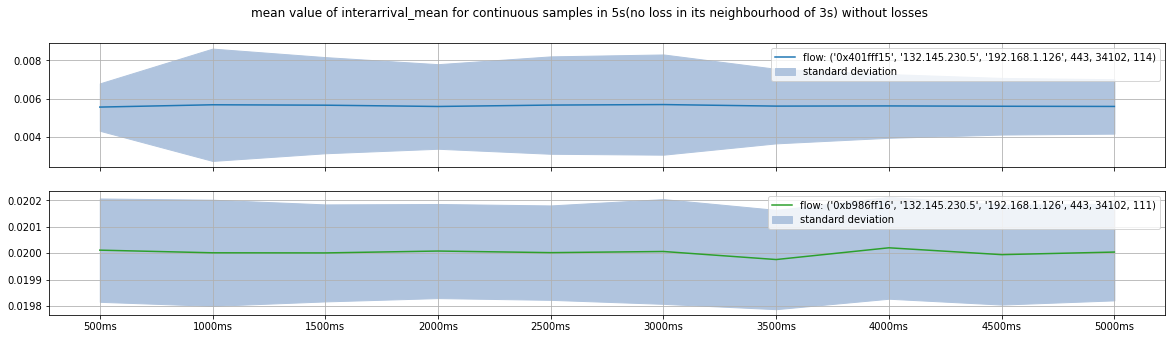

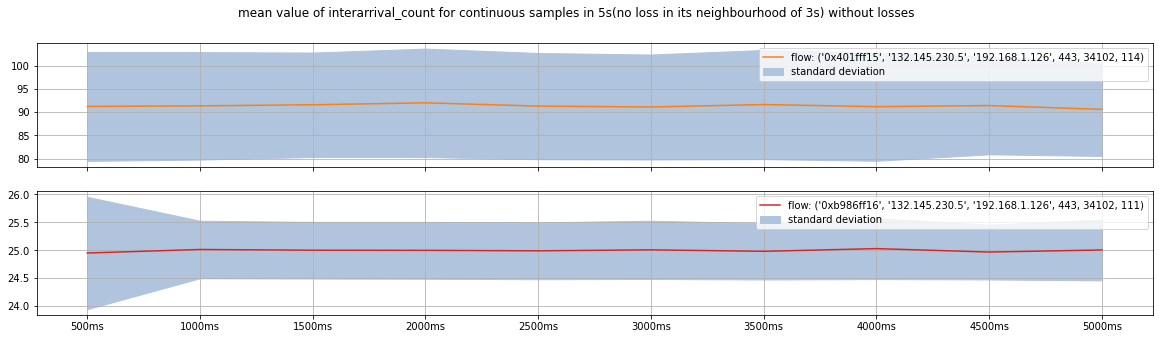

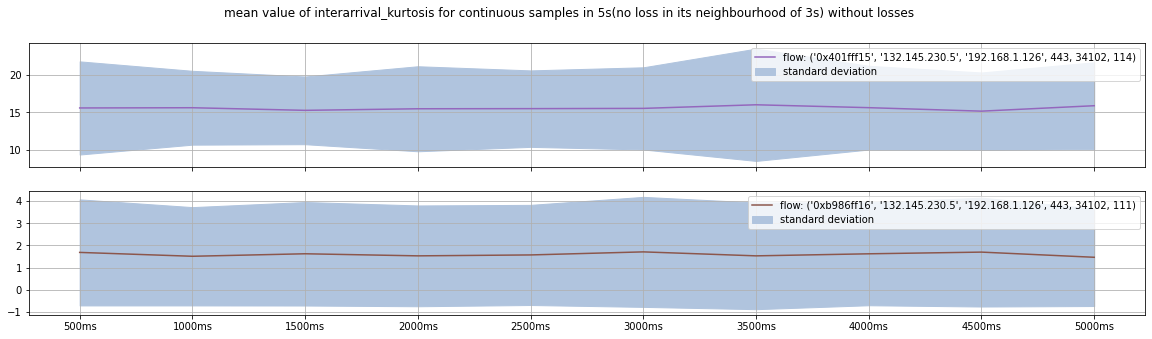

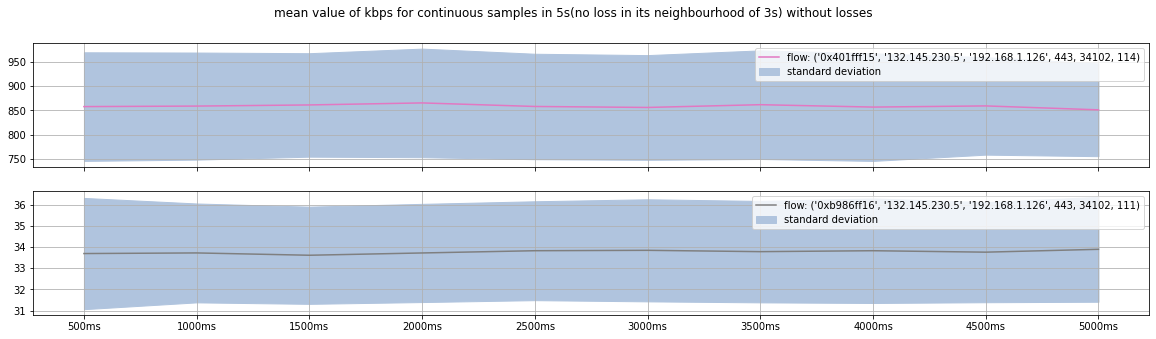

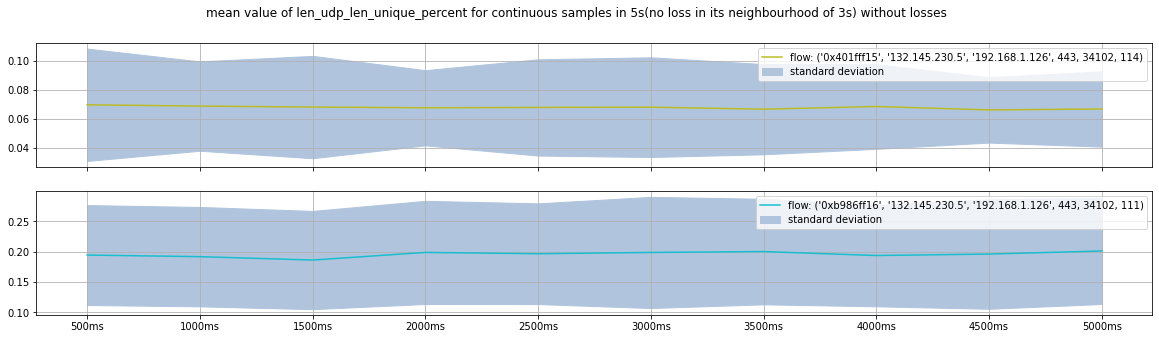

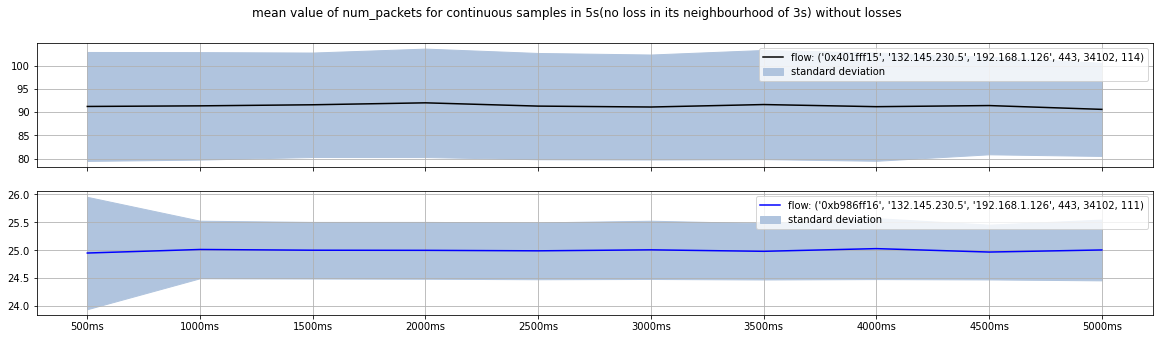

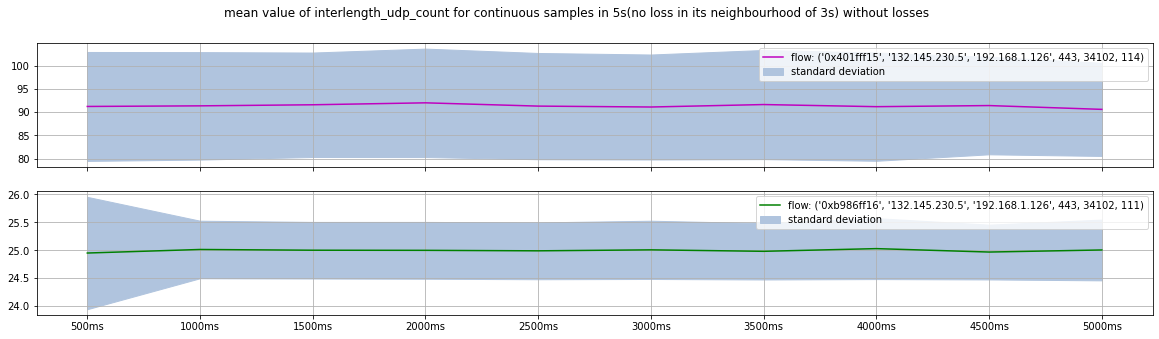

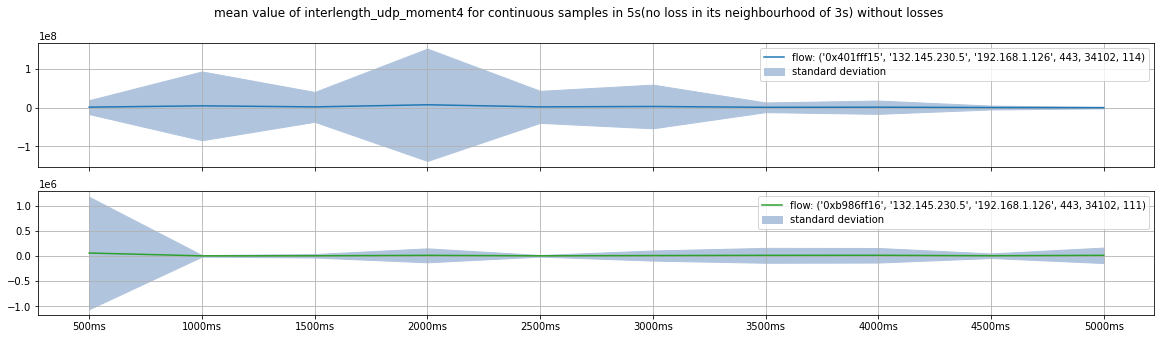

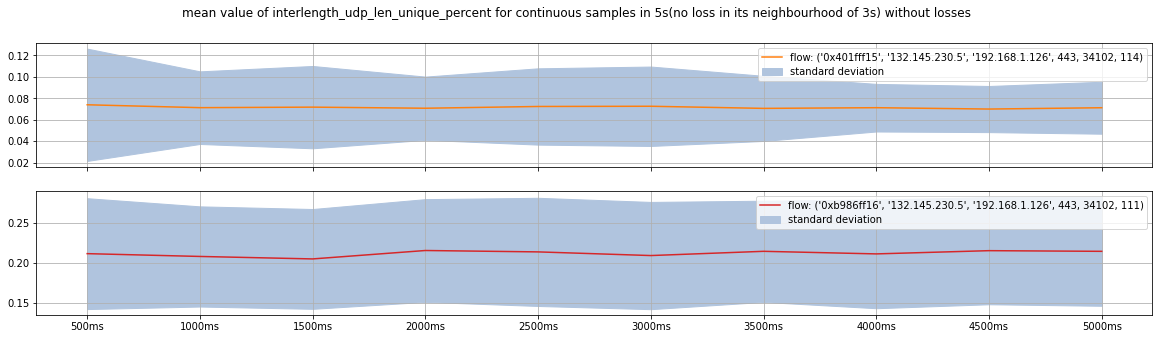

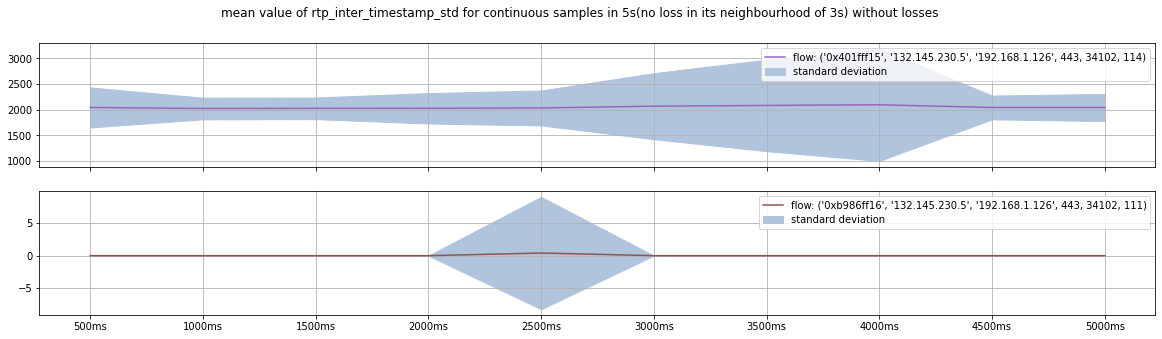

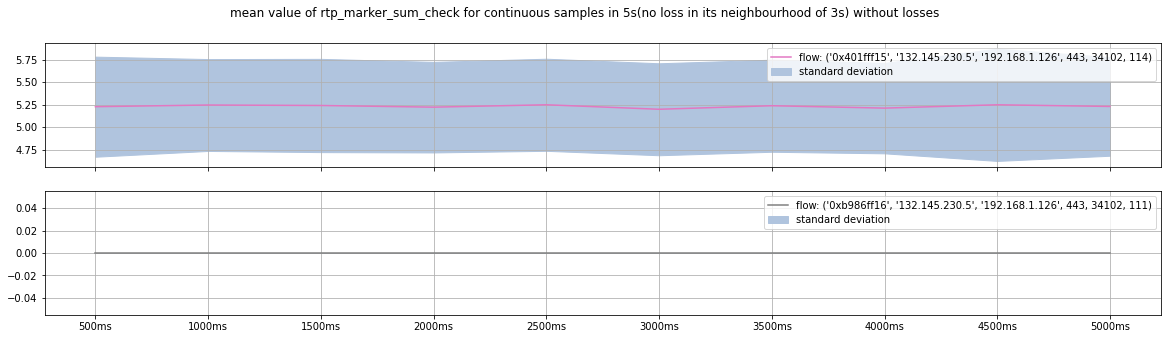

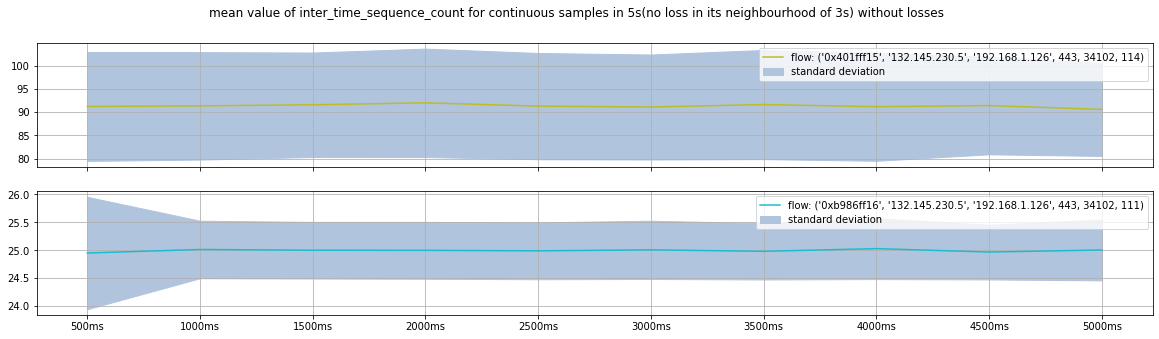

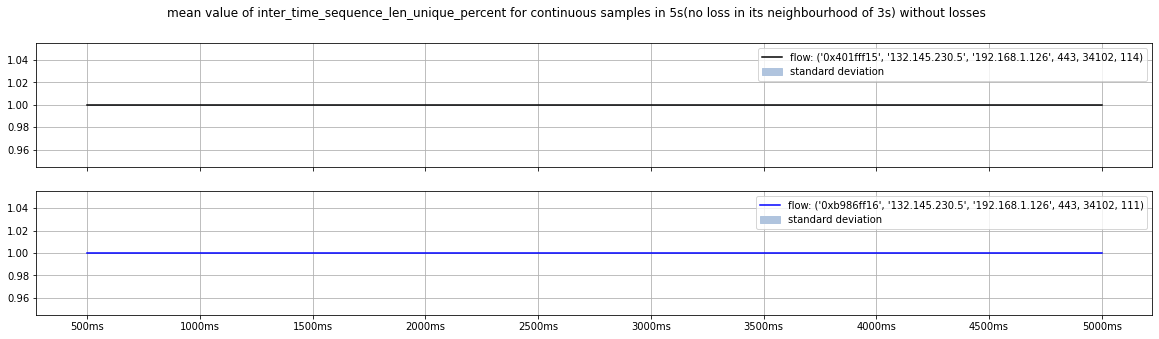

In [34]:
# continuous sample in 5 sec with no loss in the neighbourhood of 3 sec => 22 samples with no losses

x_label_list = [f'{500*i}ms' for i in range(1, 11)]
color_idx = 0

for feature in feature_list:
    idx = -1
    fig, axs = plt.subplots(len(df_total_final), figsize=(20,5), sharex=True)
    fig.suptitle(f'mean value of {feature} for continuous samples in 5s(no loss in its neighbourhood of 3s) without losses')
    for df_per_flow in df_total_final:
        df_temp = copy.deepcopy(df_per_flow)
        idx += 1
        value_position = {}
        for i in range(1,11):
            value_position[str(i)] = []
        
        # deal with index
        all_index_list = df_temp.index.tolist()
        loss_index_list = df_temp[df_temp['lossOrNot'] > 0].index
        dropped_index_list = []
        for loss_idx in loss_index_list:
            for new_idx in range(loss_idx-6, loss_idx+7):
                if new_idx not in dropped_index_list:
                    dropped_index_list.append(new_idx)
        no_loss_idx_list = []
        for old_idx in all_index_list:
            if old_idx not in dropped_index_list:
                no_loss_idx_list.append(old_idx)
        idx_temp = 0
        while True:
            if idx_temp + 9 >= len(no_loss_idx_list):
                break
            if no_loss_idx_list[idx_temp+9] - no_loss_idx_list[idx_temp] == 9:
                inrea = 0
                for i in range(1,11):
                    value_position[str(i)].append(df_per_flow.iloc[no_loss_idx_list[idx_temp+inrea]][feature])
                    inrea += 1
                idx_temp += 10
            idx_temp += 1
        
        result_mean = []
        result_std = []
        for i in range(1,11):
            temp_array = np.array(value_position[str(i)])
            temp_array = temp_array[~np.isnan(temp_array)]
            result_mean.append(temp_array.mean())
            result_std.append(np.std(temp_array))
        result_mean = np.array(result_mean)
        result_std = np.array(result_std)
            
        axs[idx].plot(x_label_list, result_mean, color=color_for_plot_list[color_idx], label=f'flow: {flow_name_list[idx]}')
        axs[idx].fill_between(x_label_list, result_mean-result_std, result_mean+result_std, color='lightsteelblue', label='standard deviation')
        axs[idx].legend()
        axs[idx].grid()
        if color_idx == len(color_for_plot_list)-1:
            color_idx = 0
        else:
            color_idx += 1
            
    plt.show()

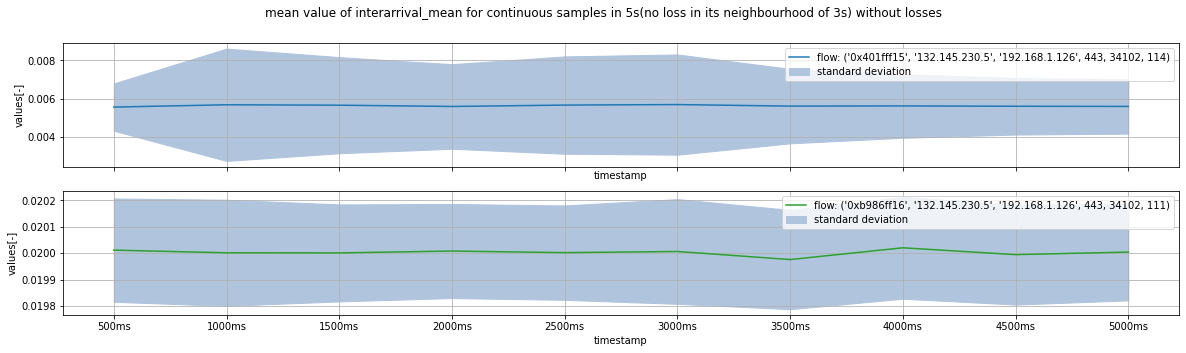

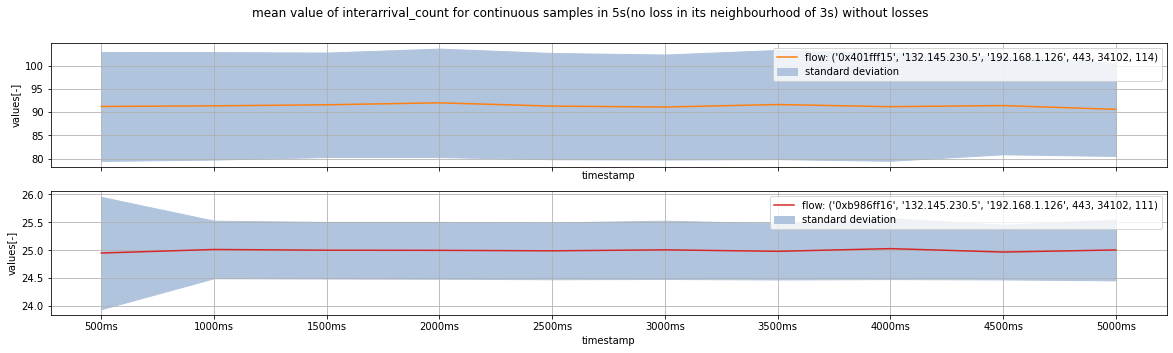

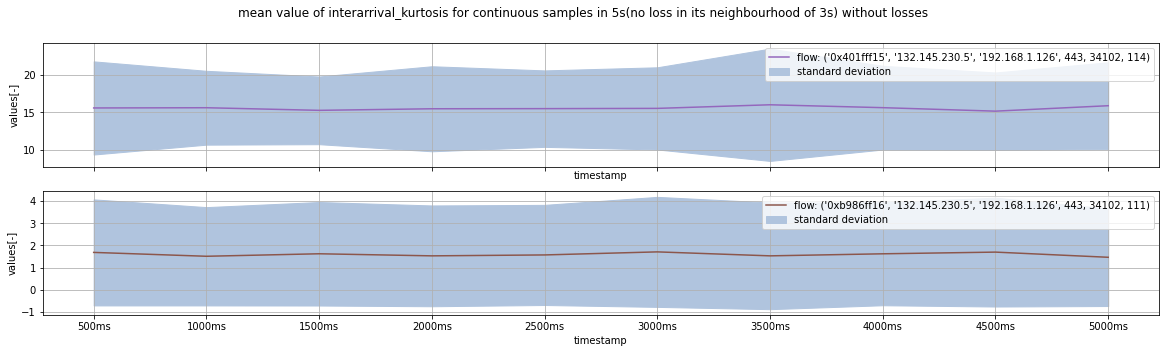

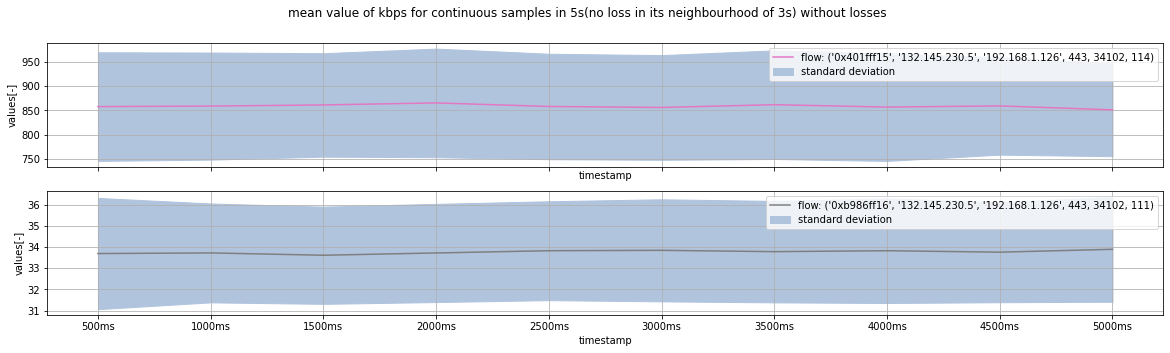

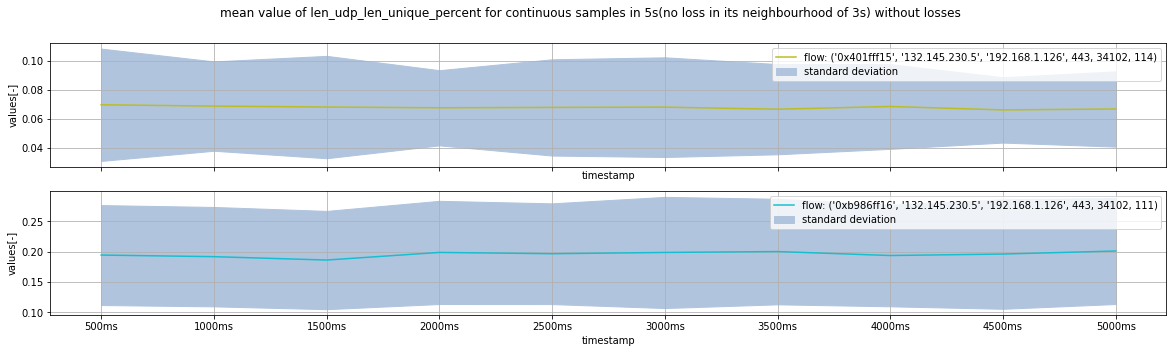

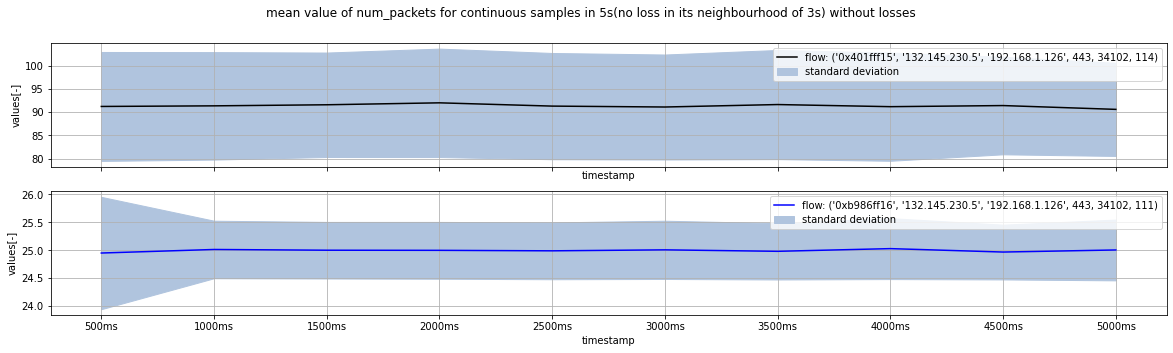

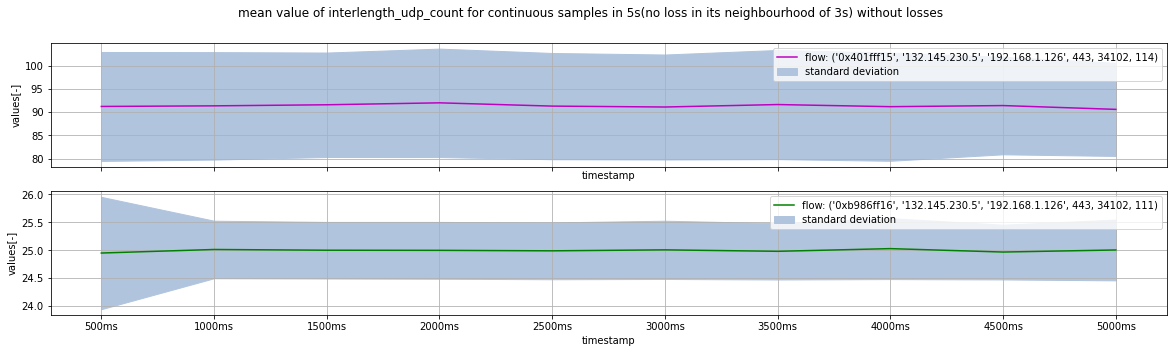

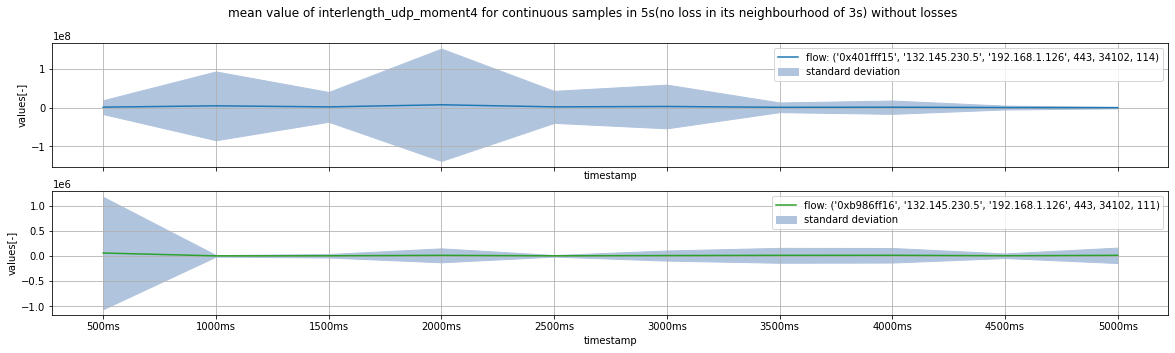

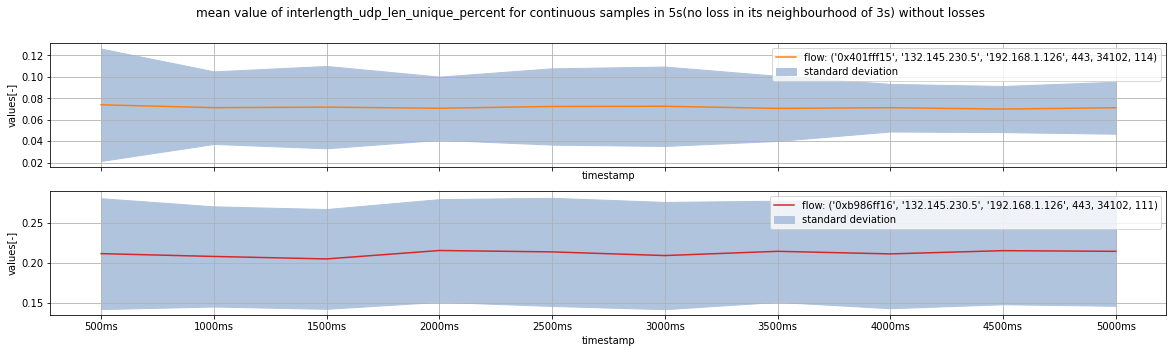

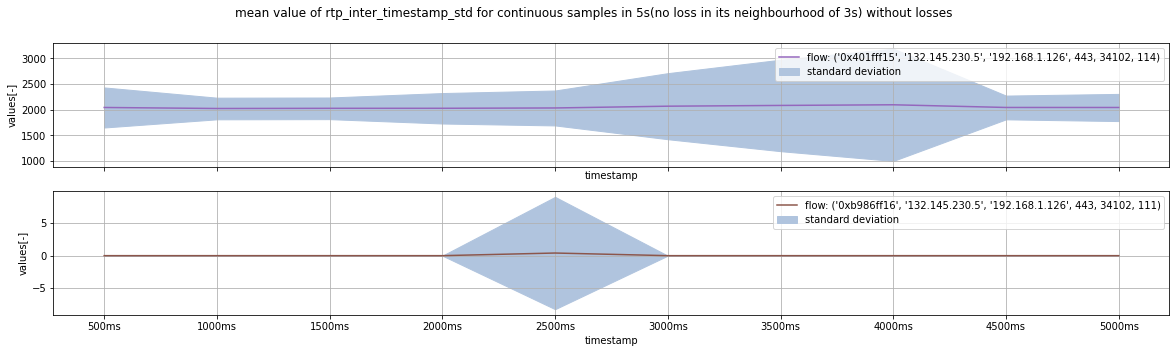

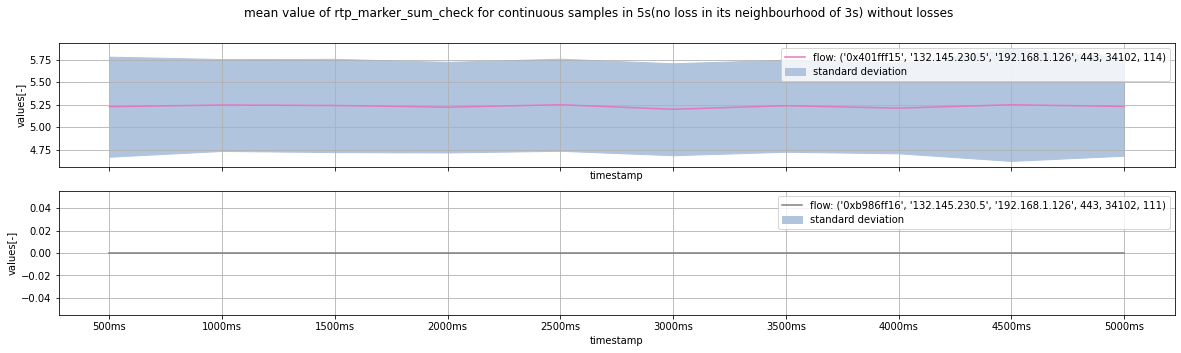

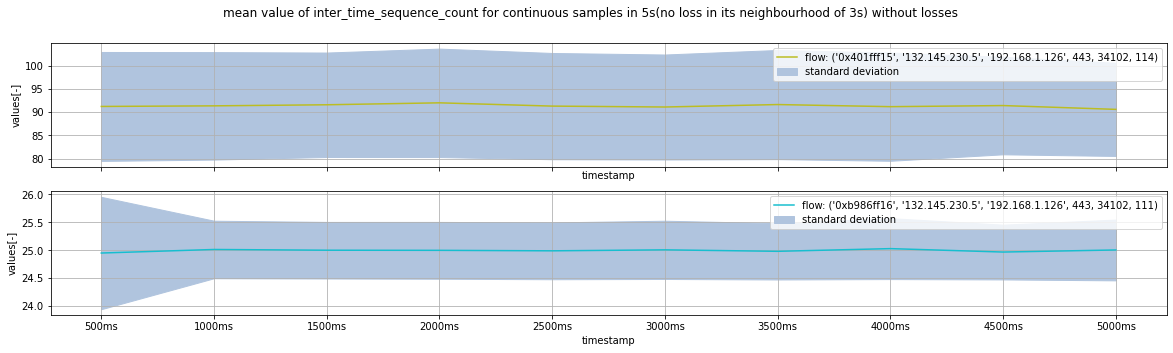

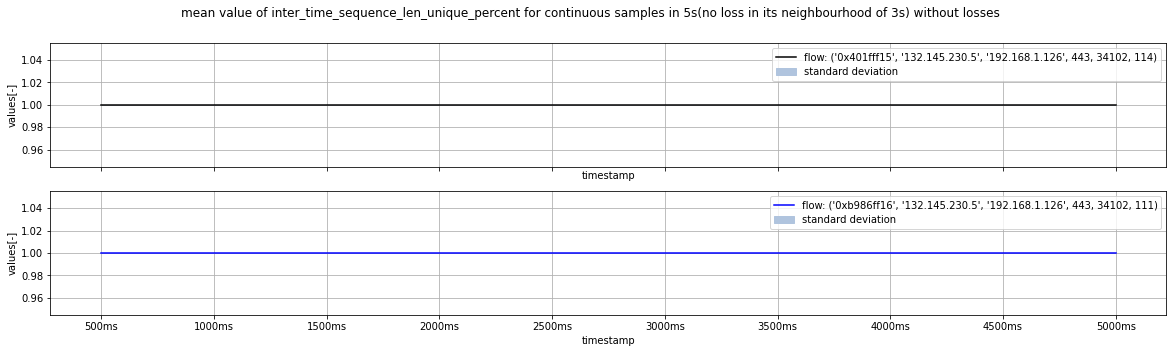

In [35]:
# continuous sample in 5 sec with no loss in the neighbourhood of 3 sec => 22 samples with no losses
# for better plots in thesis

x_label_list = [f'{500*i}ms' for i in range(1, 11)]
color_idx = 0

for feature in feature_list:
    idx = -1
    fig, axs = plt.subplots(len(df_total_final), figsize=(20,5), sharex=True)
    fig.suptitle(f'mean value of {feature} for continuous samples in 5s(no loss in its neighbourhood of 3s) without losses')
    for df_per_flow in df_total_final:
        df_temp = copy.deepcopy(df_per_flow)
        idx += 1
        value_position = {}
        for i in range(1,11):
            value_position[str(i)] = []
        
        # deal with index
        all_index_list = df_temp.index.tolist()
        loss_index_list = df_temp[df_temp['lossOrNot'] > 0].index
        dropped_index_list = []
        for loss_idx in loss_index_list:
            for new_idx in range(loss_idx-6, loss_idx+7):
                if new_idx not in dropped_index_list:
                    dropped_index_list.append(new_idx)
        no_loss_idx_list = []
        for old_idx in all_index_list:
            if old_idx not in dropped_index_list:
                no_loss_idx_list.append(old_idx)
        idx_temp = 0
        while True:
            if idx_temp + 9 >= len(no_loss_idx_list):
                break
            if no_loss_idx_list[idx_temp+9] - no_loss_idx_list[idx_temp] == 9:
                inrea = 0
                for i in range(1,11):
                    value_position[str(i)].append(df_per_flow.iloc[no_loss_idx_list[idx_temp+inrea]][feature])
                    inrea += 1
                idx_temp += 10
            idx_temp += 1
        
        result_mean = []
        result_std = []
        for i in range(1,11):
            temp_array = np.array(value_position[str(i)])
            temp_array = temp_array[~np.isnan(temp_array)]
            result_mean.append(temp_array.mean())
            result_std.append(np.std(temp_array))
        result_mean = np.array(result_mean)
        result_std = np.array(result_std)
            
        axs[idx].plot(x_label_list, result_mean, color=color_for_plot_list[color_idx], label=f'flow: {flow_name_list[idx]}')
        axs[idx].fill_between(x_label_list, result_mean-result_std, result_mean+result_std, color='lightsteelblue', label='standard deviation')
        axs[idx].legend()
        axs[idx].set_xlabel('timestamp')
        axs[idx].set_ylabel('values[-]')
        axs[idx].grid()
        if color_idx == len(color_for_plot_list)-1:
            color_idx = 0
        else:
            color_idx += 1
            
    plt.show()

#### Output for challenges in thesis for "interarrival_std"

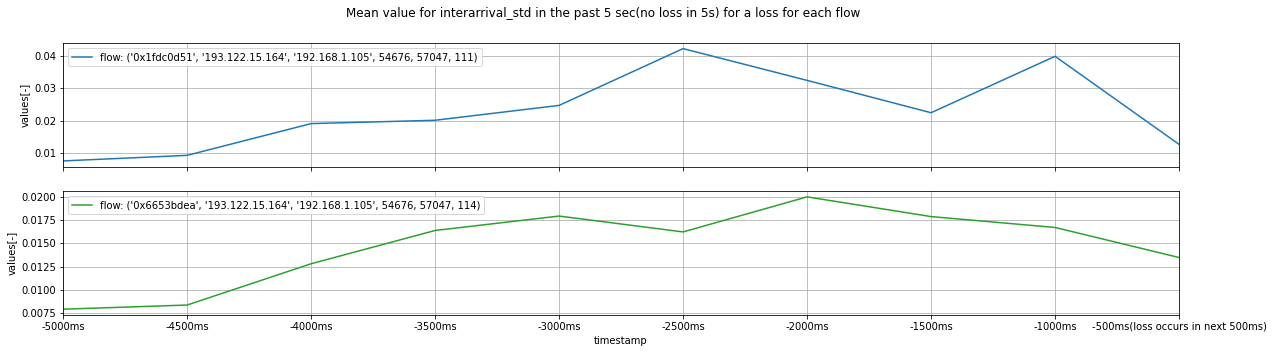

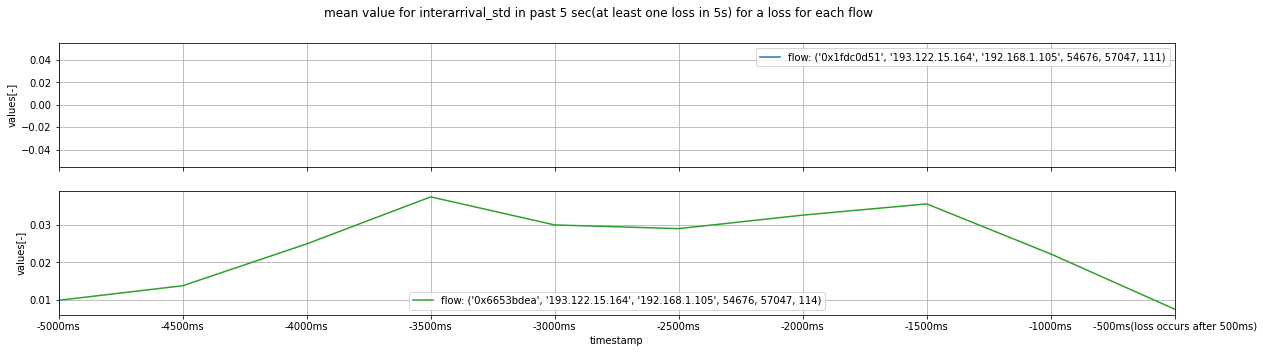

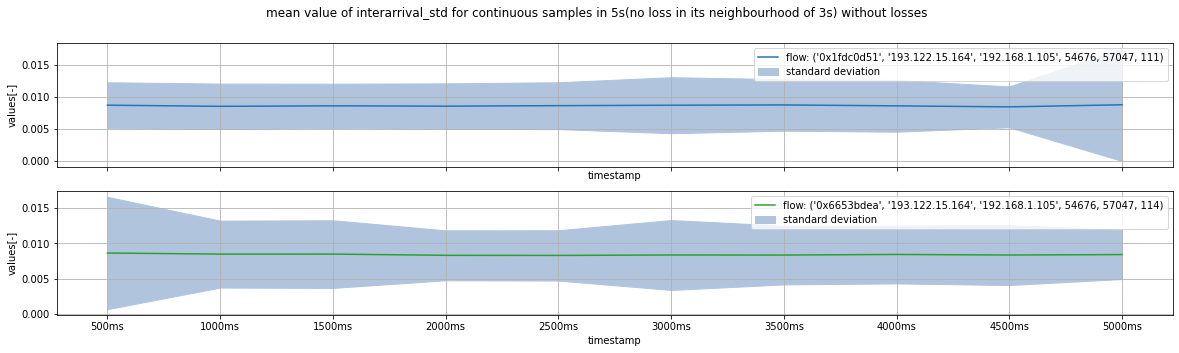

In [23]:
# average behaviour witth no loss in the past 5s for a loss
# for 'Retina/shared/Dataset_jitsi/Call_17_2p_meo/Jitsi_Meo_2p_av_2020_11_12_500ms_Song_no_log.csv'

dist_list = [i for i in range(1, 11)]
x_label_list = [f'-{500*i}ms' for i in range(1, 11)]
x_label_list[0] = f'{x_label_list[0]}(loss occurs in next 500ms)'
x_label_list.reverse()

color_idx = 0
for feature in ['interarrival_std']:
    idx = 0
    fig, axs = plt.subplots(len(df_total_final), figsize=(20,5), sharex=True)
    fig.suptitle(f'Mean value for {feature} in the past 5 sec(no loss in 5s) for a loss for each flow')
    
    for df_per_flow in df_total_final:
        df_temp = copy.deepcopy(df_per_flow)
        loss_index_list = df_temp[df_temp['lossOrNot'] > 0].index
        if len(loss_index_list) != 0:
            loss_index_list_no_consecutive = []
            for i in range(len(loss_index_list)-1, 0, -1):
                if (loss_index_list[i] - loss_index_list[i-1]) not in dist_list:
                    loss_index_list_no_consecutive.append(loss_index_list[i])
            loss_index_list_no_consecutive.append(loss_index_list[0])
            
            loss_index_list_no_consecutive_final = []
            for loss_idx in loss_index_list_no_consecutive:
                if loss_idx >= 10:
                    temp_values_list = df_temp.iloc[loss_idx-10:loss_idx][feature]
                    if temp_values_list.isnull().sum() == 0:
                        loss_index_list_no_consecutive_final.append(loss_idx)

            mean_stat_list = []
            std_stat_list = []
            window_size = 2 * 5 # 5sec
            for i in range(window_size, 0, -1):
                values = df_temp.iloc[[x - i for x in loss_index_list_no_consecutive_final]][feature]
                mean_stat_list.append(values.mean())
                std_stat_list.append(np.std(values))
            
            axs[idx].plot(x_label_list, mean_stat_list, color=color_for_plot_list[color_idx], label=f'flow: {flow_name_list[idx]}')
            axs[idx].grid()
            axs[idx].set_xlim(0, 9)
            axs[idx].legend()
            axs[idx].set_xlabel('timestamp')
            axs[idx].set_ylabel('values[-]')
            axs[idx].label_outer()
            if color_idx == len(color_for_plot_list)-1:
                color_idx = 0
            else:
                color_idx += 1
            
        idx += 1
         
    plt.show()
    
# at least one loss in the past 5s for a loss

dist_list = [i for i in range(1, 11)]
x_label_list = [f'-{500*i}ms' for i in range(1, 11)]
x_label_list[0] = f'{x_label_list[0]}(loss occurs after 500ms)'
x_label_list.reverse()

color_idx = 0
for feature in ['interarrival_std']:
    idx = 0
    fig, axs = plt.subplots(len(df_total_final), figsize=(20,5), sharex=True)
    fig.suptitle(f'mean value for {feature} in past 5 sec(at least one loss in 5s) for a loss for each flow')
    
    for df_per_flow in df_total_final:
        df_temp = copy.deepcopy(df_per_flow)
        loss_index_list = df_temp[df_temp['lossOrNot'] > 0].index
        loss_index_list_with_consecutive = []
        for i in range(len(loss_index_list)-1, 0, -1):
            if (loss_index_list[i] - loss_index_list[i-1]) in dist_list:
                loss_index_list_with_consecutive.append(loss_index_list[i])   
                
        if len(loss_index_list_with_consecutive) != 0:
            loss_index_list_with_consecutive_final = []
            for loss_idx in loss_index_list_with_consecutive:
                if loss_idx >= 10:
                    temp_values_list = df_temp.iloc[loss_idx-10:loss_idx][feature]
                    if temp_values_list.isnull().sum() == 0:
                        loss_index_list_with_consecutive_final.append(loss_idx)
                    
            mean_stat_list = []
            std_stat_list = []
            window_size = 2 * 5 # 5sec
            for i in range(window_size, 0, -1):
                values = df_temp.iloc[[x - i for x in loss_index_list_with_consecutive_final]][feature]
                mean_stat_list.append(values.mean())
                std_stat_list.append(np.std(values))

            axs[idx].plot(x_label_list, mean_stat_list, color=color_for_plot_list[color_idx], label=f'flow: {flow_name_list[idx]}')
            axs[idx].grid(True)
            axs[idx].set_xlim(0, 9)
            axs[idx].legend()
            axs[idx].set_xlabel('timestamp')
            axs[idx].set_ylabel('values[-]')
            axs[idx].label_outer()
            if color_idx == len(color_for_plot_list)-1:
                color_idx = 0
            else:
                color_idx += 1
            
        idx += 1
         
    plt.show()
    
# continuous sample in 5 sec with no loss in the neighbourhood of 3 sec => 22 samples with no losses

x_label_list = [f'{500*i}ms' for i in range(1, 11)]
color_idx = 0

for feature in ['interarrival_std']:
    idx = -1
    fig, axs = plt.subplots(len(df_total_final), figsize=(20,5), sharex=True)
    fig.suptitle(f'mean value of {feature} for continuous samples in 5s(no loss in its neighbourhood of 3s) without losses')
    for df_per_flow in df_total_final:
        df_temp = copy.deepcopy(df_per_flow)
        idx += 1
        value_position = {}
        for i in range(1,11):
            value_position[str(i)] = []
        
        # deal with index
        all_index_list = df_temp.index.tolist()
        loss_index_list = df_temp[df_temp['lossOrNot'] > 0].index
        dropped_index_list = []
        for loss_idx in loss_index_list:
            for new_idx in range(loss_idx-6, loss_idx+7):
                if new_idx not in dropped_index_list:
                    dropped_index_list.append(new_idx)
        no_loss_idx_list = []
        for old_idx in all_index_list:
            if old_idx not in dropped_index_list:
                no_loss_idx_list.append(old_idx)
        idx_temp = 0
        while True:
            if idx_temp + 9 >= len(no_loss_idx_list):
                break
            if no_loss_idx_list[idx_temp+9] - no_loss_idx_list[idx_temp] == 9:
                inrea = 0
                for i in range(1,11):
                    value_position[str(i)].append(df_per_flow.iloc[no_loss_idx_list[idx_temp+inrea]][feature])
                    inrea += 1
                idx_temp += 10
            idx_temp += 1
        
        result_mean = []
        result_std = []
        for i in range(1,11):
            temp_array = np.array(value_position[str(i)])
            temp_array = temp_array[~np.isnan(temp_array)]
            result_mean.append(temp_array.mean())
            result_std.append(np.std(temp_array))
        result_mean = np.array(result_mean)
        result_std = np.array(result_std)
            
        axs[idx].plot(x_label_list, result_mean, color=color_for_plot_list[color_idx], label=f'flow: {flow_name_list[idx]}')
        axs[idx].fill_between(x_label_list, result_mean-result_std, result_mean+result_std, color='lightsteelblue', label='standard deviation')
        axs[idx].legend()
        axs[idx].set_xlabel('timestamp')
        axs[idx].set_ylabel('values[-]')
        axs[idx].grid()
        if color_idx == len(color_for_plot_list)-1:
            color_idx = 0
        else:
            color_idx += 1
            
    plt.show()